# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project we have HR data of a company. A study is requested from me to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, we have two types of employee one who stayed and another who left the company.

we can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, we must use exploratory data analysis and data visualization techniques. 

Then, wee must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. we are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. we are asked to use the ***K-means*** algorithm to make cluster analysis. However, we must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model,we must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train our models with your train set, test the success of our model with our test set. 

Try to make our predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. We can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, we will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [1]:
import sklearn
sklearn.__version__

'1.1.3'

### Importing Modules

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.express as px
from plotly.express import scatter_3d,pie,line
from ipywidgets import interact
#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve,plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC, ClassPredictionError
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

from scikitplot.metrics import plot_roc, precision_recall_curve

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn import cluster

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.gridspec as gridspec # to do the grid of plots

import pickle


### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df = pd.read_csv("HR_Dataset.csv")
df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0               0.380            0.530               2                   157   
1               0.800            0.860               5                   262   
2               0.110            0.880               7                   272   
3               0.720            0.870               5                   223   
4               0.370            0.520               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

### Data Insights

In the given dataset, we have two types of employee one who stayed and another who left the company. So, we can divide data into two groups and compare their characteristics. Moreover, we can find the average of both the groups using groupby() and mean() function.

In [4]:
df.describe(include=object)

Departments  salary
count         14999  14999
unique           10      3
top           sales    low
freq           4140   7316

In [5]:
numerical = df.select_dtypes(exclude='object')
numerical.sample(3)

satisfaction_level  last_evaluation  number_project  \
13654               0.580            0.800               4   
1429                0.870            0.910               4   
13301               0.870            0.520               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
13654                   113                   3              0     0   
1429                    255                   5              0     1   
13301                   140                   3              0     0   

       promotion_last_5years  
13654                      0  
1429                       0  
13301                      0

In [6]:
categorical = df.select_dtypes(include='object')
categorical.sample(3)

Departments   salary
281        support     low
13082           hr  medium
1085         sales  medium

In [7]:
df.shape

(14999, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [10]:
df.duplicated().sum()

3008

In [11]:
df.drop_duplicates(keep='first', inplace=True)

In [12]:
df.describe().T

count    mean    std    min     25%     50%     75%  \
satisfaction_level    11991.000   0.630  0.241  0.090   0.480   0.660   0.820   
last_evaluation       11991.000   0.717  0.168  0.360   0.570   0.720   0.860   
number_project        11991.000   3.803  1.163  2.000   3.000   4.000   5.000   
average_montly_hours  11991.000 200.474 48.728 96.000 157.000 200.000 243.000   
time_spend_company    11991.000   3.365  1.330  2.000   3.000   3.000   4.000   
Work_accident         11991.000   0.154  0.361  0.000   0.000   0.000   0.000   
left                  11991.000   0.166  0.372  0.000   0.000   0.000   0.000   
promotion_last_5years 11991.000   0.017  0.129  0.000   0.000   0.000   0.000   

                          max  
satisfaction_level      1.000  
last_evaluation         1.000  
number_project          7.000  
average_montly_hours  310.000  
time_spend_company     10.000  
Work_accident           1.000  
left                    1.000  
promotion_last_5years   1.000

In [13]:
df.rename({'Departments ': 'department',
           "Work_accident": "work_accident", 
           "average_montly_hours":"average_monthly_hours"}, axis=1, inplace=True)
df.head(1)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0               0.380            0.530               2                    157   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   

  salary  
0    low

In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [14]:
df.left.value_counts() #"left" is our Target column

0    10000
1     1991
Name: left, dtype: int64

In [8]:
df = df[['satisfaction_level', 'last_evaluation', 'number_project',
         'average_monthly_hours', 'time_spend_company', 'work_accident',
         'promotion_last_5years', 'department', 'salary', 'left']]
df.head(1) 

#We put the left column at the end because it is the target column and to work more comfortably.

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0               0.380            0.530               2                    157   

   time_spend_company  work_accident  promotion_last_5years department salary  \
0                   3              0                      0      sales    low   

   left  
0     1

In [14]:
fig = px.pie(df, values = df['left'].value_counts(), 
             names = (df['left'].value_counts()).index, 
             title = '"Left" Column Distribution',width=800,
                   height=600,)
fig.show();

In [22]:
print("Remain Rate   ","     Churn Rate")
df.left.value_counts(normalize=True)[0]*100 , df.left.value_counts(normalize=True)[1]*100

Remain Rate         Churn Rate


(83.39588024351598, 16.604119756484028)

In [23]:
df_churn = df[df.left == 1]
df_churn.head() #to see the left people from the company

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0               0.380            0.530               2                    157   
1               0.800            0.860               5                    262   
2               0.110            0.880               7                    272   
3               0.720            0.870               5                    223   
4               0.370            0.520               2                    159   

   time_spend_company  work_accident  promotion_last_5years department  \
0                   3              0                      0      sales   
1                   6              0                      0      sales   
2                   4              0                      0      sales   
3                   5              0                      0      sales   
4                   3              0                      0      sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [24]:
df_remain = df[df.left == 0]
df_remain.head() #to see the people who stay and not left from the company.

satisfaction_level  last_evaluation  number_project  \
2000               0.580            0.740               4   
2001               0.820            0.670               2   
2002               0.450            0.690               5   
2003               0.780            0.820               5   
2004               0.490            0.600               3   

      average_monthly_hours  time_spend_company  work_accident  \
2000                    215                   3              0   
2001                    202                   3              0   
2002                    193                   3              0   
2003                    247                   3              0   
2004                    214                   2              0   

      promotion_last_5years department salary  left  
2000                      0      sales    low     0  
2001                      0      sales    low     0  
2002                      0      sales    low     0  
2003                      0      sales    low     0  
2004                      0      sales    low     0

In [25]:
df_remain.describe().T

count    mean    std    min     25%     50%     75%  \
satisfaction_level    10000.000   0.667  0.217  0.120   0.540   0.690   0.840   
last_evaluation       10000.000   0.716  0.162  0.360   0.580   0.710   0.850   
number_project        10000.000   3.787  0.982  2.000   3.000   4.000   4.000   
average_monthly_hours 10000.000 198.943 45.666 96.000 162.000 198.000 238.000   
time_spend_company    10000.000   3.262  1.367  2.000   2.000   3.000   4.000   
work_accident         10000.000   0.174  0.380  0.000   0.000   0.000   0.000   
promotion_last_5years 10000.000   0.019  0.138  0.000   0.000   0.000   0.000   
left                  10000.000   0.000  0.000  0.000   0.000   0.000   0.000   

                          max  
satisfaction_level      1.000  
last_evaluation         1.000  
number_project          6.000  
average_monthly_hours 287.000  
time_spend_company     10.000  
work_accident           1.000  
promotion_last_5years   1.000  
left                    0.000

In [26]:
df_churn.describe()

satisfaction_level  last_evaluation  number_project  \
count            1991.000         1991.000        1991.000   
mean                0.440            0.722           3.883   
std                 0.265            0.197           1.817   
min                 0.090            0.450           2.000   
25%                 0.110            0.520           2.000   
50%                 0.410            0.790           4.000   
75%                 0.730            0.910           6.000   
max                 0.920            1.000           7.000   

       average_monthly_hours  time_spend_company  work_accident  \
count               1991.000            1991.000       1991.000   
mean                 208.162               3.881          0.053   
std                   61.295               0.974          0.224   
min                  126.000               2.000          0.000   
25%                  146.000               3.000          0.000   
50%                  226.000               4.000          0.000   
75%                  262.500               5.000          0.000   
max                  310.000               6.000          1.000   

       promotion_last_5years     left  
count               1991.000 1991.000  
mean                   0.004    1.000  
std                    0.063    0.000  
min                    0.000    1.000  
25%                    0.000    1.000  
50%                    0.000    1.000  
75%                    0.000    1.000  
max                    1.000    1.000

We have these insights;

- We can say that, churned employees were not happy at work.
- Both group has nearly close evaluaton point from employer shows that most of the churned employees left willingly from company if there was not an extraordinary situations such as economical crisis.

- Number of project and average monthly hours and time spend in company bring into that company lose more experienced employee and they were working more projects and spending more hours for company to compare with stayed employees.

- Surprisingly employees who stayed in the company have more work accident ratio. And promotion has significant role in people's choice and churned employees has less promotion rate.


**Time Spent Company:** 
> Column "time_spent_company" means employee experience. The number of years spent by an employee in the company.

In [28]:
df.time_spend_company.value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

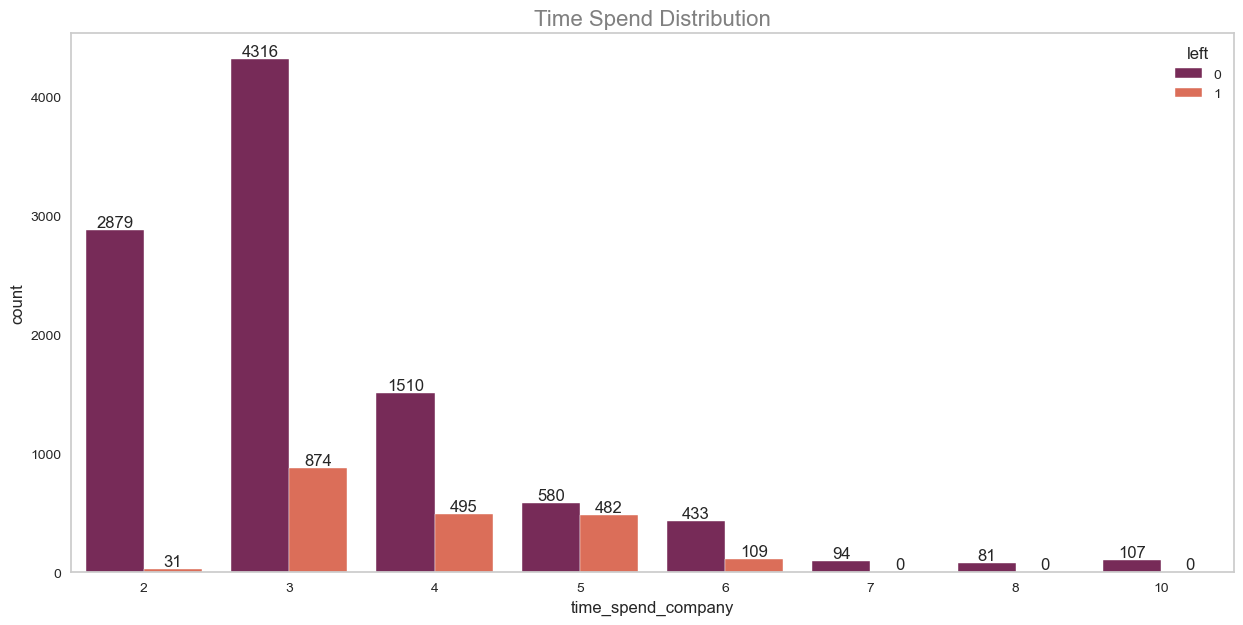

In [29]:
fig = plt.figure(figsize=(15,7))
ax =sns.countplot(x='time_spend_company',data=df, hue ="left", palette="rocket")
ax.set_title('Time Spend Distribution', fontsize=16, color='grey')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [15]:
px.histogram(df, x = 'time_spend_company', color = 'number_project', 
             title = "Level of Employee's Experience & The Number of Projects of Employees")


- Most of the employee experience between 2–4 years. Also, there is a huge gap between 3 years and 4 years of experienced employees about number of project
- In the **3rd year** , the maximum workload was given to the personel, then it decreased.
- Considering that the number of leavings is very high in the **3rd year**, we can think that the increase in the workload is also effective.
- Most of the employee is doing the project from 3–5.
- There is a huge drop between 3 years and 4 years of experienced employees.

In [16]:
fig = px.strip(df[df['left'] == 1], x = 'satisfaction_level', y = 'last_evaluation', color = 'time_spend_company',
               title ="Employee's Satisfaction  &  Company's Evaluation")
fig.show();

- They could not make a clear assessment about the company until the **3rd year**
- By the **4th year**, their workload increases and their satisfaction decreases.

### Feature Engineering


Performance and happiness:

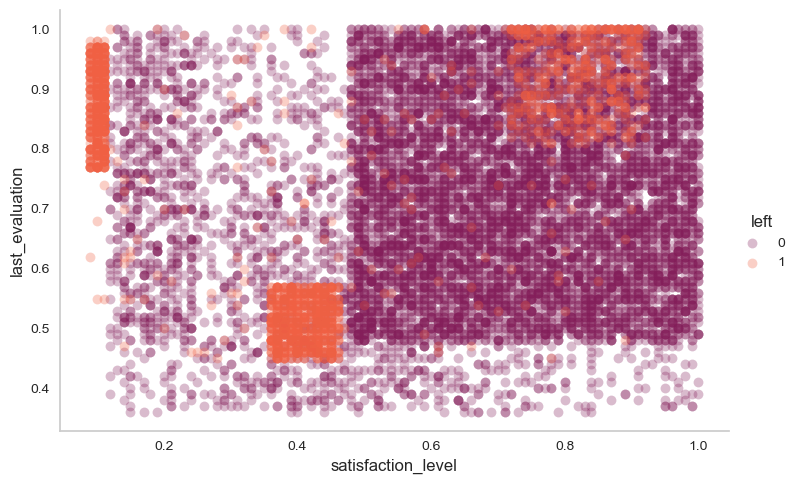

In [33]:
sns.lmplot(x='satisfaction_level',
          y='last_evaluation',
          data=df,hue='left',
          fit_reg=False,aspect=1.5,scatter_kws={'alpha':0.3,"s": 50},palette="rocket"
         );

As we see above,

1) We see that there are workers with 4 years of experience who are dissatisfied with the company and are considered by the company to be performing well.

2)Employees who are in their 3rd year and have low satisfaction

3) We see workers with 5+ experience who are satisfied with the company and are considered by the company to be performing well.

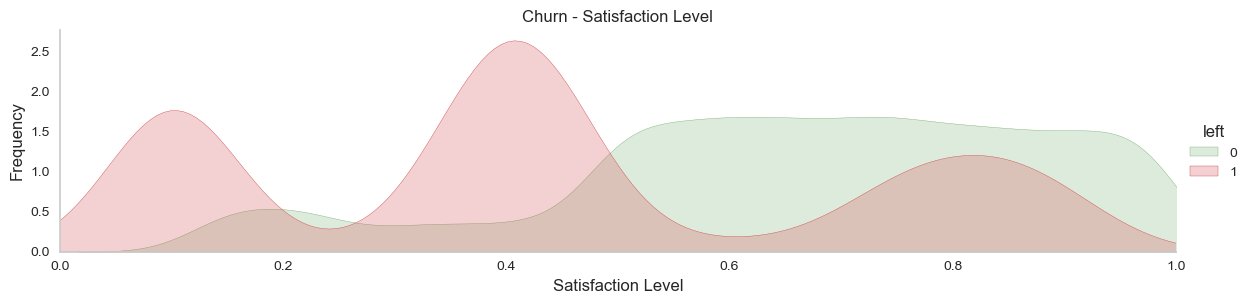

In [34]:
colors = ['faded green','faded red']
fg = sns.FacetGrid(df, hue = 'left', aspect = 4, palette = sns.xkcd_palette(colors))
fg.map(sns.kdeplot, 'satisfaction_level', shade = True)
fg.set(xlim=(0, df['satisfaction_level'].max()))
plt.title('Churn - Satisfaction Level')
fg.add_legend(), fg.set_axis_labels('Satisfaction Level', 'Frequency');

As the level of satisfaction increases, churn rate decreases.

**OUR FIRST INSIGHT:**

- We have three clusters of churned employees:

- Underperformers: last_evaluation < 0.6

- **Unhappy**: satisfaction_level < 0.2

- **Overachievers**: last_evaluation > 0.8 and satisfaction > 0.7

**Workload and performance:**

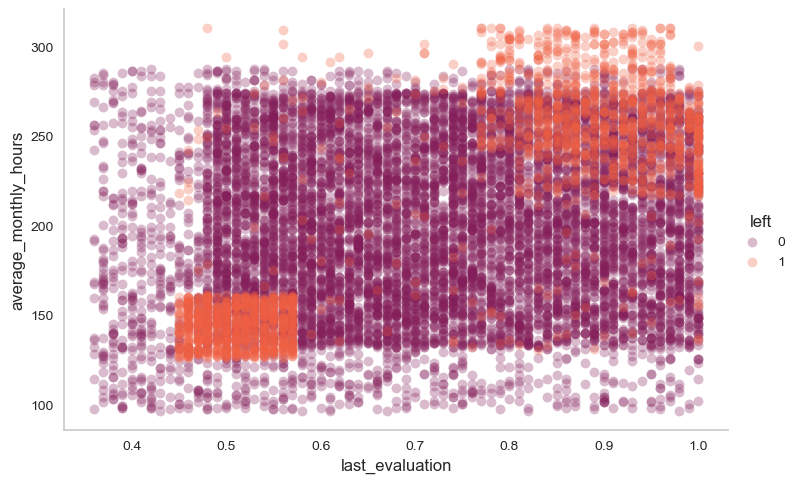

In [35]:
sns.lmplot(x='last_evaluation',
          y='average_monthly_hours',
          data=df,hue='left',
          fit_reg=False,aspect=1.5,scatter_kws={'alpha':0.3,"s": 50},palette="rocket"
         );

**OUR SECOND INSIGHT:**

- We have two clusters of churned employees:

- **Stars:** avg_monthly_hrs > 215 and last_evaluation > 0.75

- **Slackers:** avg_monthly_hrs < 165 and last_evaluation < 0.65

**Workload and happiness:**

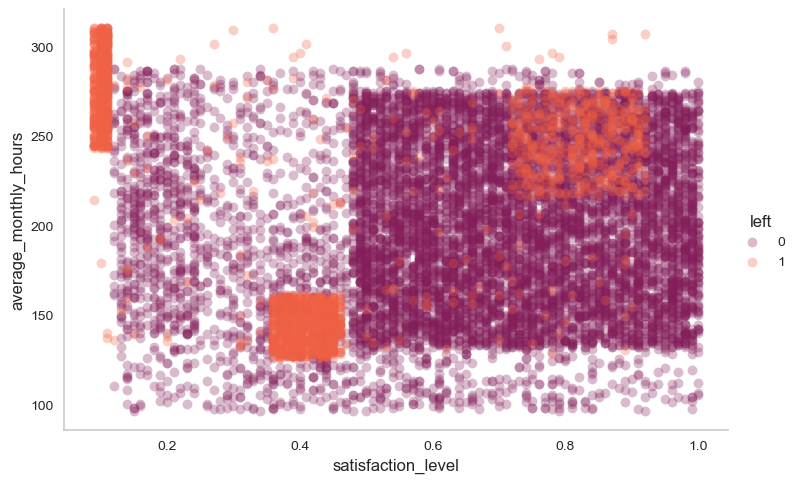

In [38]:
sns.lmplot(x='satisfaction_level',
          y='average_monthly_hours',
          data=df,hue='left',
          fit_reg=False,aspect=1.5,scatter_kws={'alpha':0.3,"s": 50},palette="rocket",        
         );

**OUR THIRD INSIGHT:**

- We have three clusters of churned employees:

- Workaholics: avg_monthly_hrs > 210 and satisfation > 0.7

- Just-a-job: avg_monthly_hrs < 170

- Overworked: avg_monthly_hrs > 225 and satisfaction < 0.2



In [37]:
#Let’s engineer new features for these 8 ‘stereotypical’ clusters of employees:

df['underperformer'] = (df.last_evaluation < 0.6).astype(int)
df['unhappy'] = (df.satisfaction_level < 0.2).astype(int)
df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction_level > 0.7)).astype(int)
df['stars'] = ((df.average_monthly_hours > 215) & (df.last_evaluation > 0.75)).astype(int)
df['slackers'] = (df.average_monthly_hours < 165) & (df.last_evaluation < 0.65) .astype(int)
df['workaholic'] = ((df.average_monthly_hours > 210) & (df.satisfaction_level > 0.7)).astype(int)
df['justajob'] = (df.average_monthly_hours < 170).astype(int)
df['overworked'] = ((df.average_monthly_hours > 225) & (df.satisfaction_level < 0.2)).astype(int)

In [39]:
# We can take a glance at the proportion of employees in each of these 8 groups.

df[['underperformer', 'unhappy', 'overachiever', 'stars', 
    'slackers', 'workaholic', 'justajob', 'overworked']].mean()

underperformer   0.303
unhappy          0.078
overachiever     0.181
stars            0.232
slackers         0.163
workaholic       0.216
justajob         0.329
overworked       0.055
dtype: float64

33% of employees are just-a-job employees — non-inspired and just here for the
 weekly pay cheque — while only 5% are flat out overworked.

 **Analytical base table**: 
The dataset after applying all of these data cleaning 
steps and feature engineering is our analytical base table. This is the data on which we train our models.

In [40]:
df_remain.time_spend_company.value_counts()

3     4316
2     2879
4     1510
5      580
6      433
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

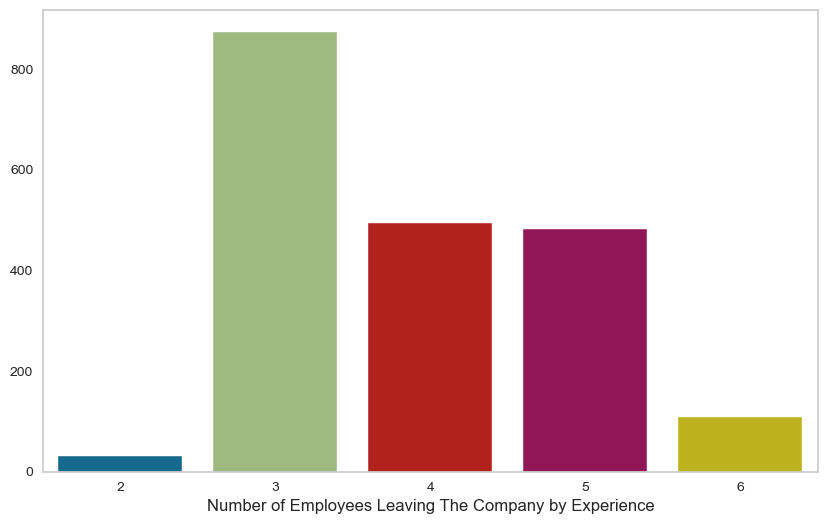

In [42]:
sns.barplot(x=df_churn.time_spend_company.value_counts().index,
           y=df_churn.time_spend_company.value_counts().values);
plt.xlabel('Number of Employees Leaving The Company by Experience');

In [43]:
df_churn.time_spend_company.value_counts()

3    874
4    495
5    482
6    109
2     31
Name: time_spend_company, dtype: int64

In [44]:
df_remain.groupby('time_spend_company').mean().T

time_spend_company         2       3       4       5       6       7       8   \
satisfaction_level      0.701   0.697   0.638   0.479   0.514   0.636   0.665   
last_evaluation         0.718   0.717   0.720   0.702   0.693   0.683   0.712   
number_project          3.682   3.729   3.913   4.216   4.058   3.851   3.778   
average_monthly_hours 199.743 199.219 198.607 193.331 200.051 200.745 193.802   
work_accident           0.173   0.169   0.164   0.212   0.194   0.138   0.272   
promotion_last_5years   0.014   0.019   0.014   0.017   0.025   0.191   0.062   
left                    0.000   0.000   0.000   0.000   0.000   0.000   0.000   

time_spend_company         10  
satisfaction_level      0.655  
last_evaluation         0.731  
number_project          3.682  
average_monthly_hours 199.224  
work_accident           0.234  
promotion_last_5years   0.075  
left                    0.000

In [45]:
df_churn.groupby('time_spend_company').mean().T

time_spend_company          2       3       4       5       6
satisfaction_level      0.537   0.412   0.145   0.708   0.798
last_evaluation         0.754   0.522   0.858   0.900   0.909
number_project          3.968   2.117   5.982   4.763   4.606
average_monthly_hours 209.871 147.476 268.857 248.154 241.807
work_accident           0.032   0.053   0.057   0.054   0.037
promotion_last_5years   0.000   0.007   0.002   0.002   0.000
left                    1.000   1.000   1.000   1.000   1.000

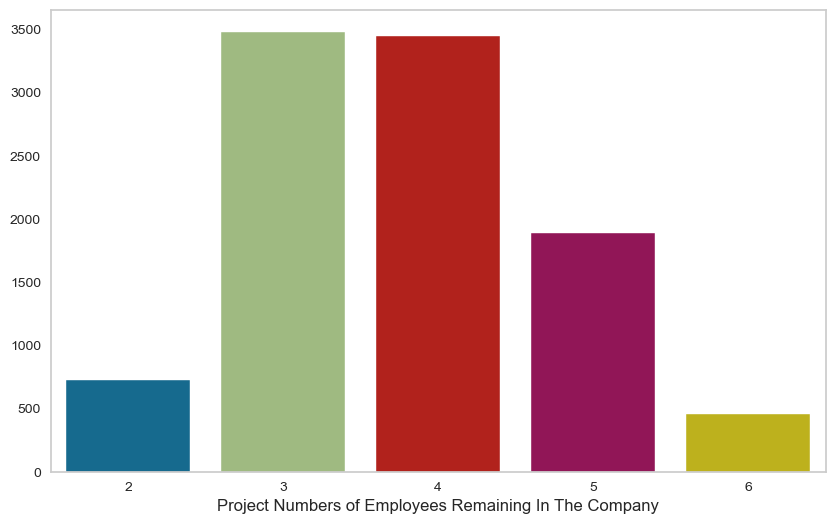

In [46]:
sns.barplot(x=df_remain.number_project.value_counts().index,
           y=df_remain.number_project.value_counts().values);
plt.xlabel('Project Numbers of Employees Remaining In The Company');
#Number of projects by Remains

In [47]:
df_churn.number_project.value_counts() #Number of projects by churn

2    857
6    371
5    343
4    237
7    145
3     38
Name: number_project, dtype: int64

In [48]:
df_remain.groupby('number_project').mean()

satisfaction_level  last_evaluation  average_monthly_hours  \
number_project                                                               
2                            0.602            0.664                186.880   
3                            0.691            0.717                197.177   
4                            0.690            0.725                201.242   
5                            0.658            0.723                202.706   
6                            0.463            0.687                198.618   

                time_spend_company  work_accident  promotion_last_5years  left  
number_project                                                                  
2                            3.381          0.181                  0.019 0.000  
3                            3.137          0.177                  0.018 0.000  
4                            3.192          0.166                  0.021 0.000  
5                            3.348          0.177                  0.017 0.000  
6                            4.204          0.193                  0.026 0.000

In [49]:
df_churn.groupby('number_project').mean() 
#Average_monthly hours by churn numbers are grater than numbers by remains,
#So we can say that churns working hours more than remains. 

satisfaction_level  last_evaluation  average_monthly_hours  \
number_project                                                               
2                            0.412            0.518                146.144   
3                            0.577            0.765                212.053   
4                            0.757            0.890                242.143   
5                            0.746            0.899                244.496   
6                            0.133            0.862                269.361   
7                            0.117            0.864                275.621   

                time_spend_company  work_accident  promotion_last_5years  left  
number_project                                                                  
2                            3.022          0.053                  0.006 1.000  
3                            3.842          0.026                  0.000 1.000  
4                            4.882          0.076                  0.008 1.000  
5                            5.015          0.047                  0.000 1.000  
6                            4.094          0.062                  0.003 1.000  
7                            4.110          0.014                  0.000 1.000

In [50]:
df_remain.average_monthly_hours.value_counts().sort_index(ascending=False)

287    13
286    23
285    15
284    11
283    11
282     9
281    13
280    18
279    14
278    12
277     8
276    11
275    36
274    61
273    60
272    60
271    68
270    62
269    62
268    59
267    55
266    71
265    59
264    64
263    65
262    48
261    67
260    78
259    56
258    69
257    82
256    57
255    64
254    59
253    61
252    59
251    65
250    64
249    59
248    59
247    61
246    70
245    63
244    54
243    74
242    64
241    62
240    62
239    63
238    80
237    69
236    54
235    53
234    54
233    72
232    64
231    62
230    49
229    66
228    51
227    57
226    70
225    68
224    88
223    65
222    65
221    57
220    50
219    57
218    59
217    63
216    66
215    60
214    63
213    63
212    64
211    61
210    64
209    60
208    62
207    61
206    71
205    65
204    60
203    63
202    72
201    77
200    53
199    68
198    70
197    64
196    67
195    59
194    60
193    61
192    77
191    66
190    66
189    72
188    61


In [51]:
df_new = pd.crosstab([df.department, df.left], df.salary)
df_new

salary            high   low  medium
department  left                    
IT          0       67   389     362
            1        4    87      67
RandD       0       44   271     294
            1        3    51      31
accounting  0       60   237     215
            1        3    59      47
hr          0       35   234     219
            1        3    62      48
management  0      127   107     150
            1        1    32      19
marketing   0       59   234     268
            1        3    76      33
product_mng 0       48   284     244
            1        4    59      47
sales       0      225  1234    1230
            1       12   319     219
support     0      121   676     712
            1        5   191     116
technical   0      156   900     798
            1       10   238     142

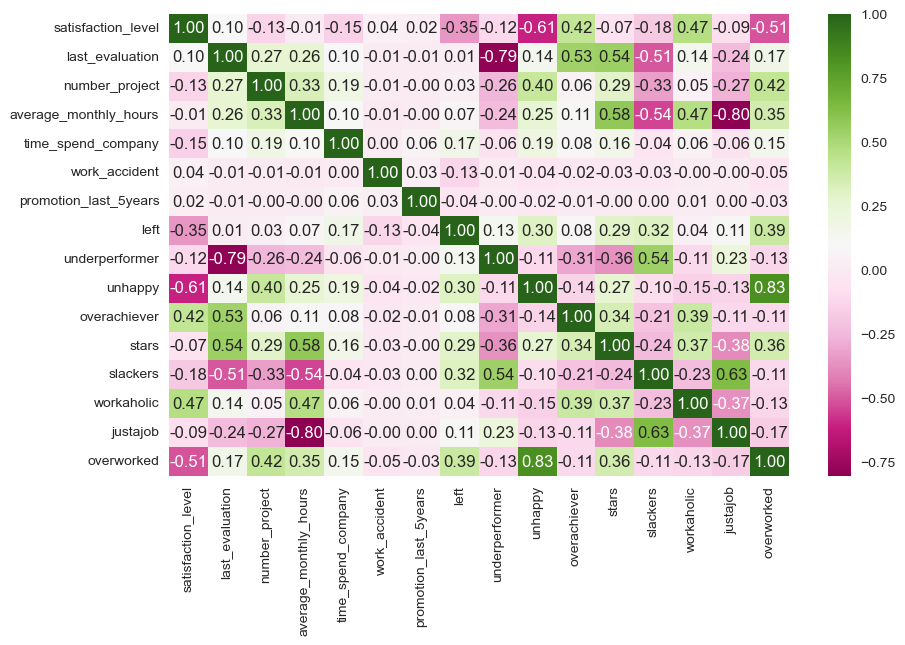

In [53]:
plt.figure(figsize = (10, 6))
sns.heatmap (df.corr(), annot = True, fmt = '.2f', linecolor="black", cmap="PiYG")
plt.xticks(rotation = 90);

**There is a multicollineartity between some features we built as feature engineering.**

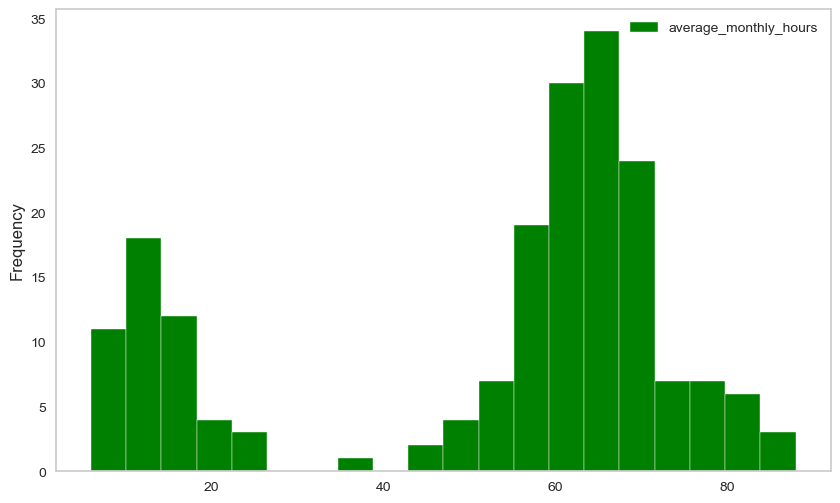

In [66]:
pd.DataFrame(df_remain.average_monthly_hours.value_counts().sort_index(ascending=False)).plot(kind = "hist",
                                                                                               bins =20,
                                                                                             color = "green");

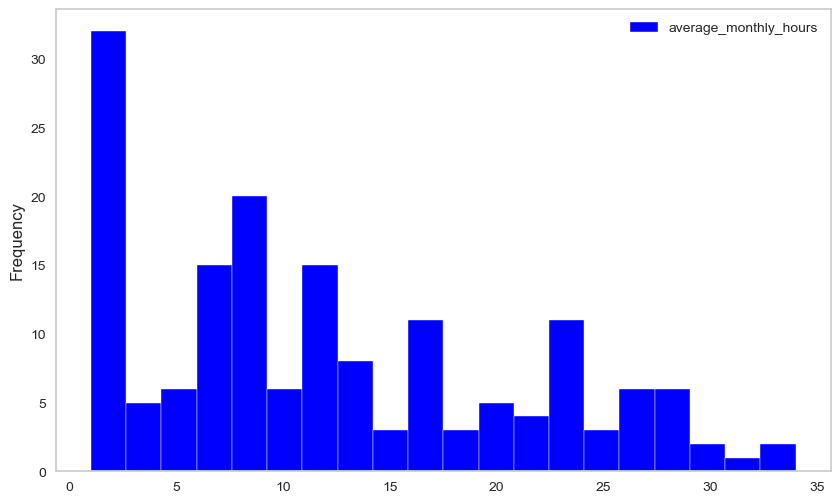

In [67]:
pd.DataFrame(df_churn.average_monthly_hours.value_counts().sort_index(ascending=False)).plot(kind = "hist",
                                                                                              bins= 20,
                                                                                              color = "blue" );

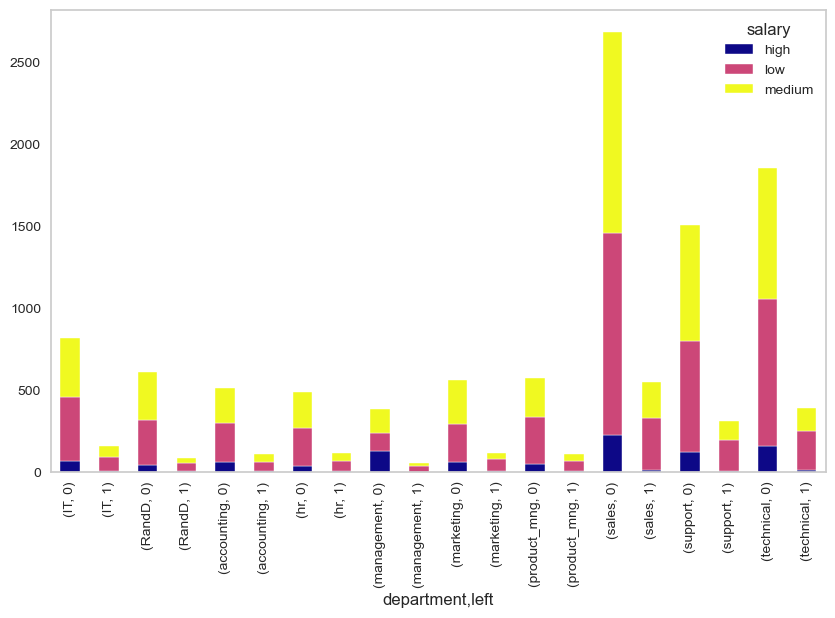

In [68]:
df_new.plot(kind='bar', stacked=True, figsize=(10,6),colormap='plasma');

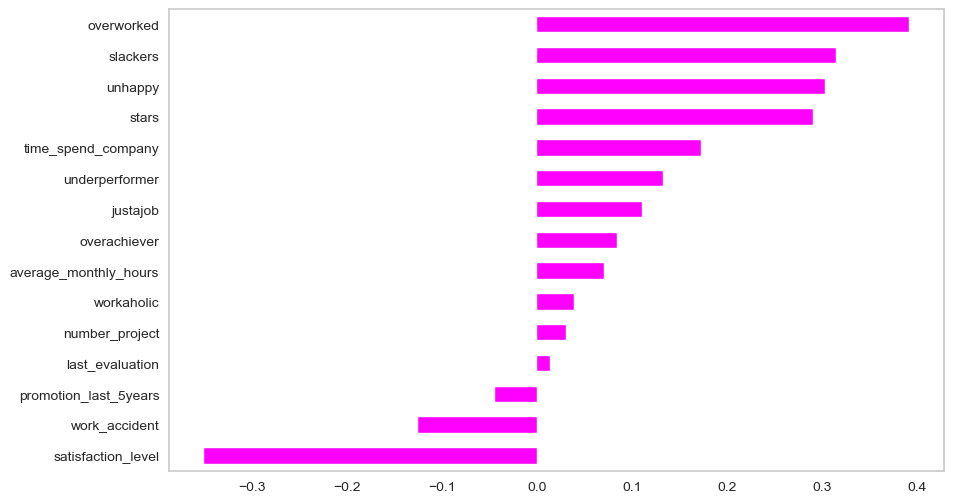

In [69]:
df.corr()['left'].sort_values().drop('left').plot(kind = 'barh',colormap='spring');

## 2. Data Visualization

We can search for answers to the following questions using data visualization methods. Based on these responses, we can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?


### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [70]:
df.left.value_counts() #İmbalannced Data

0    10000
1     1991
Name: left, dtype: int64

In [71]:
fig = px.pie(df, values = df['left'].value_counts(), 
             names = (df['left'].value_counts()).index, 
             title = '"Left" Column Distribution',width=800,
                   height=600,color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.show()

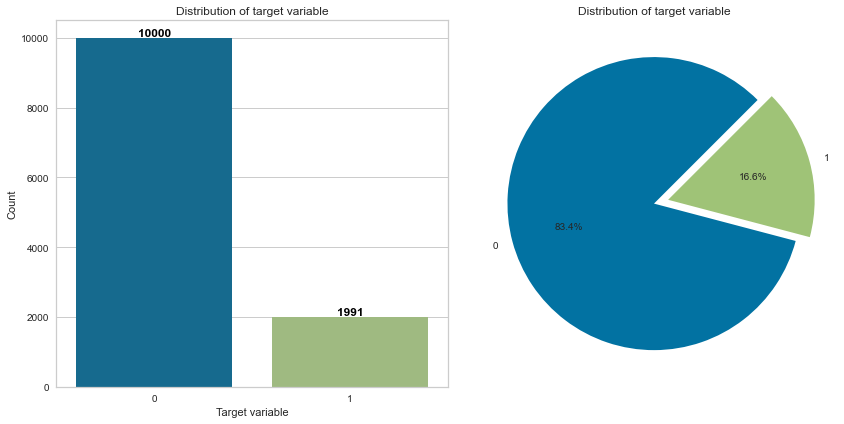

In [62]:
# with seaborn
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ax = sns.countplot(x='left', data=df)
plt.title('Distribution of target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.left.value_counts(), labels = df.left.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1))
plt.title('Distribution of target variable')
plt.tight_layout()
plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [72]:
df.number_project.value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

In [73]:
fig = px.bar(df['number_project'].value_counts(),
             labels={"index": "Number_Project", "value":"Number of employee"},
             title = '"Number_Project" Column Distribution',
             width=600,
             height=400)
fig.show();

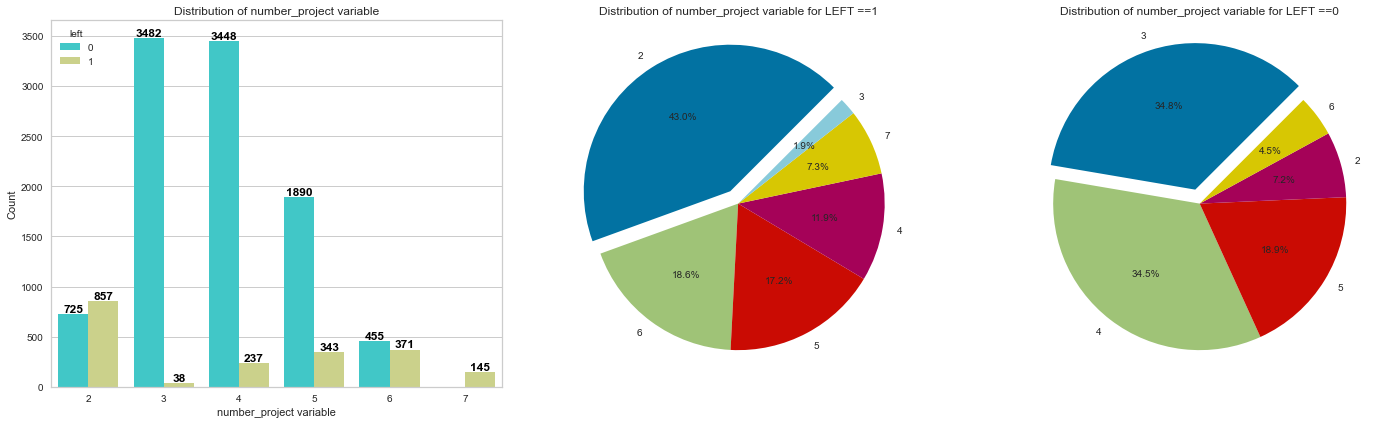

In [65]:
# with seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
ax = sns.countplot(x='number_project', data=df, hue= "left",palette = 'rainbow')
plt.title('Distribution of number_project variable')
plt.xlabel('number_project variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,3,2)
plt.pie(df[df.left == 1].number_project.value_counts(), labels = df[df.left == 1].number_project.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0,0])
plt.title('Distribution of number_project variable for LEFT ==1')
plt.subplot(1,3,3)
plt.pie(df[df.left == 0].number_project.value_counts(), labels = df[df.left == 0].number_project.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0])
plt.title('Distribution of number_project variable for LEFT ==0')
plt.tight_layout()
plt.show()

### Time Spent in Company
- Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?

In [74]:
df.time_spend_company.value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

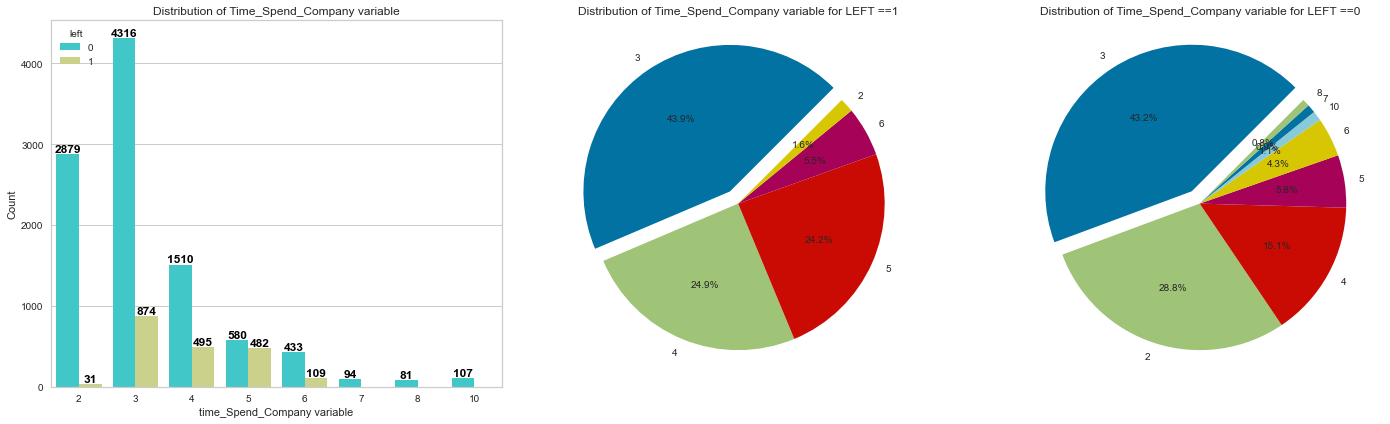

In [67]:
# with seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
ax = sns.countplot(x='time_spend_company', data=df, hue="left",palette = 'rainbow')
plt.title('Distribution of Time_Spend_Company variable')
plt.xlabel('time_Spend_Company variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,3,2)
plt.pie(df[df.left == 1].time_spend_company.value_counts(), labels = df[df.left == 1].time_spend_company.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0])
plt.title('Distribution of Time_Spend_Company variable for LEFT ==1')
plt.subplot(1,3,3)
plt.pie(df[df.left == 0].time_spend_company.value_counts(), labels = df[df.left == 0].time_spend_company.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0,0,0,0])
plt.title('Distribution of Time_Spend_Company variable for LEFT ==0')
plt.tight_layout()
plt.show()

In [75]:
import plotly.express as px
def column_histogram(col):
    fig = px.histogram(df,
                       x=col,
                       #nbins=80,
                       color="left")
    fig.show()
cols =  df.columns

interact(column_histogram,col=cols);

interactive(children=(Dropdown(description='col', options=('satisfaction_level', 'last_evaluation', 'number_pr…

In [76]:
def column_boxer1(col):
    fig = px.box(df,
                 color = "left",
                 y= col)
    fig.show() 
cols =  df.columns     
interact(column_boxer1,col = cols);

interactive(children=(Dropdown(description='col', options=('satisfaction_level', 'last_evaluation', 'number_pr…



### Satisfaction Level

In [77]:
df.groupby("left")["satisfaction_level"].describe()

count  mean   std   min   25%   50%   75%   max
left                                                    
0    10000.000 0.667 0.217 0.120 0.540 0.690 0.840 1.000
1     1991.000 0.440 0.265 0.090 0.110 0.410 0.730 0.920

Total number for people who is in satisfaction class HIGH : 3599
Total number for people who is in satisfaction class LOW : 1184
Total number for people who is in satisfaction class NORMAL : 2872
Total number for people who is in satisfaction class VERY HIGH : 3342
Total number for people who is in satisfaction class VERY LOW : 994


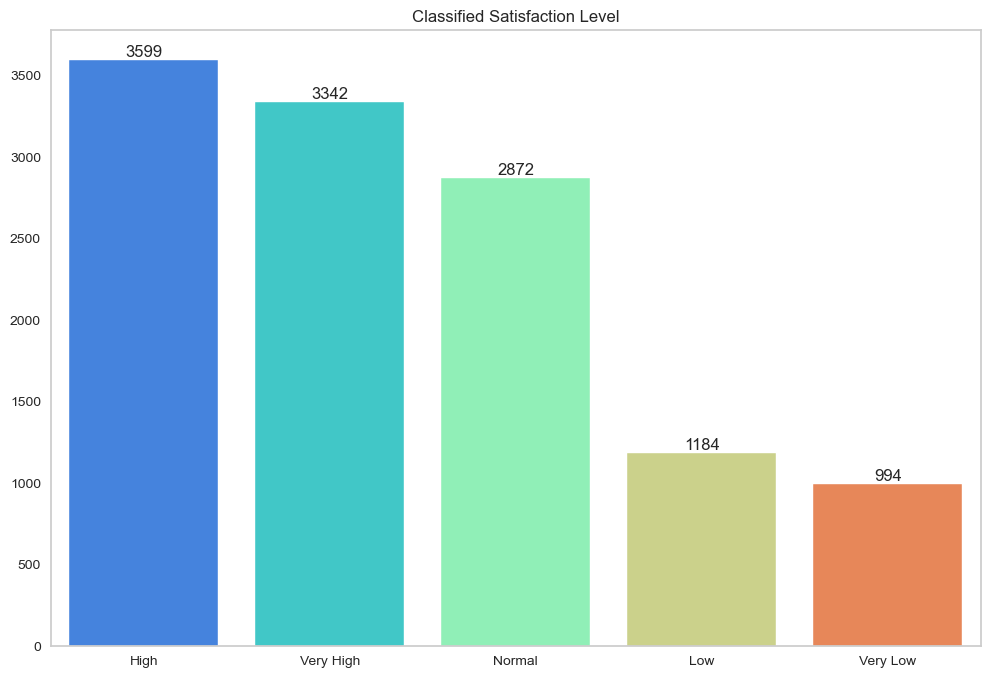

In [78]:
def satisfact(x):
    
    """This function classifies satisfaction level!!!"""
    
    if x <= 0.20:
        return "Very Low"
    elif x <= 0.40:
        return "Low"
    elif x <= 0.60:
        return "Normal"
    elif x <= 0.80:
        return "High"
    else:
        return "Very High"
    
df["satisfaction_class"] = df["satisfaction_level"].apply(satisfact)

for i in df.groupby("satisfaction_class")["left"].count().index:
    print("Total number for people who is in satisfaction class", i.upper(),":", df.groupby("satisfaction_class")["left"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Classified Satisfaction Level")
ax = sns.barplot(x=df["satisfaction_class"].value_counts().index, y=df["satisfaction_class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

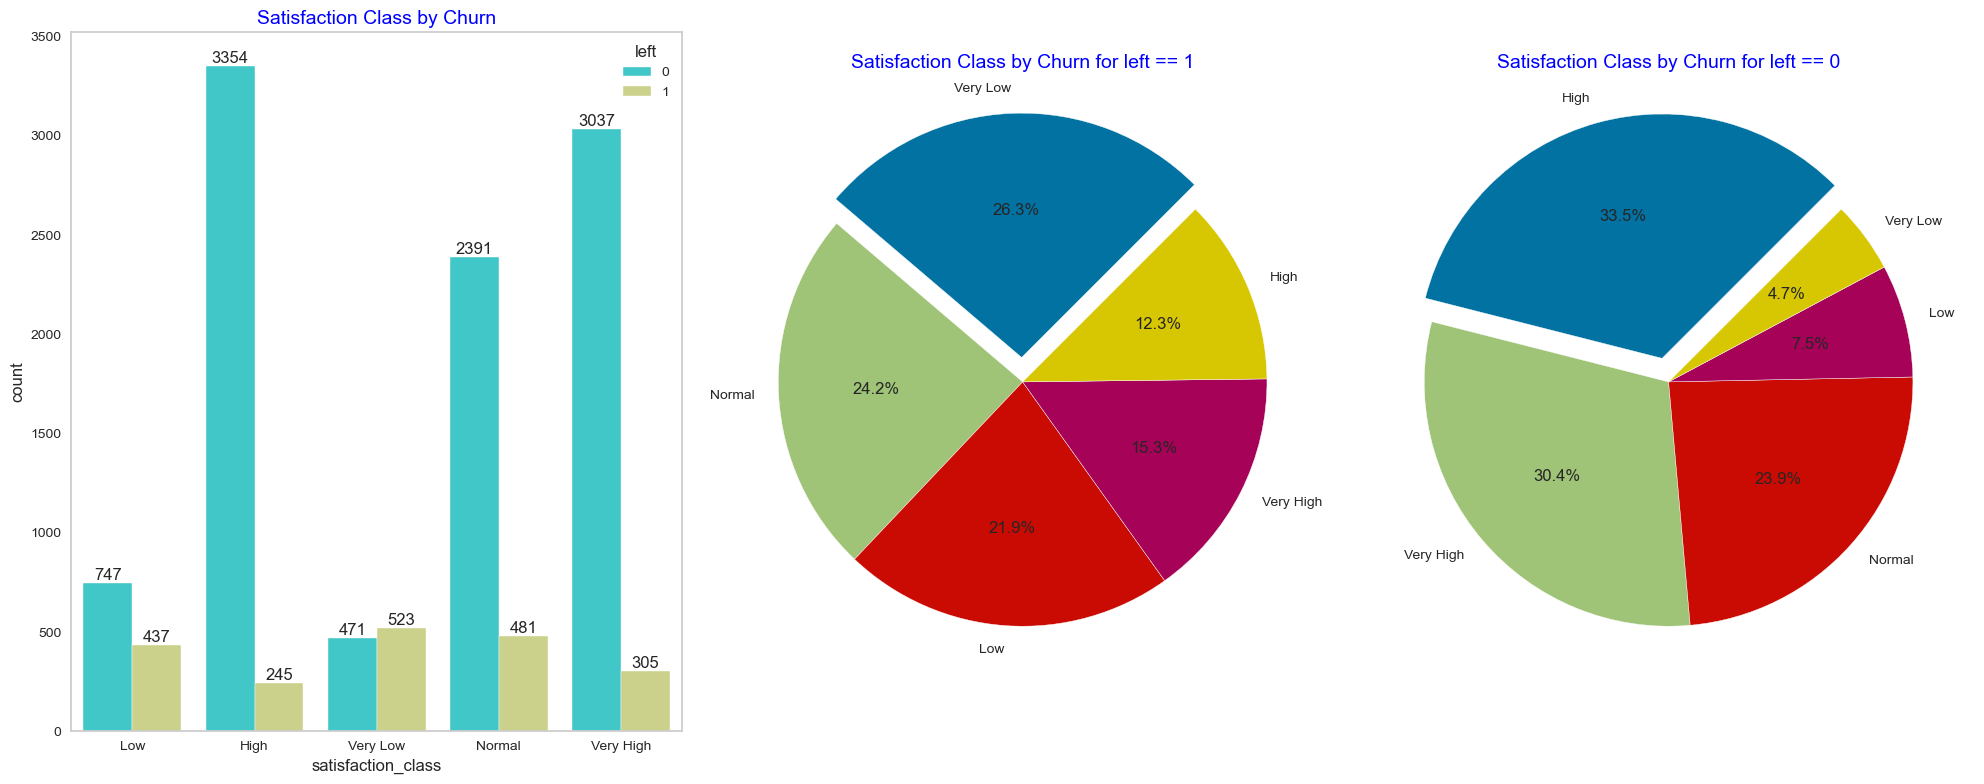

In [80]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
plt.title("Satisfaction Class by Churn", c="blue", size=14)
ax = sns.countplot(x="satisfaction_class", hue="left", data=df, palette = 'rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.title("Satisfaction Class by Churn for left == 1", c="blue", size=14)
plt.pie(df[df.left == 1].satisfaction_class.value_counts(), labels = df[df.left == 1].satisfaction_class.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0])
plt.subplot(1,3,3)
plt.title("Satisfaction Class by Churn for left == 0", c="blue", size=14)
plt.pie(df[df.left == 0].satisfaction_class.value_counts(), labels = df[df.left == 0].satisfaction_class.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0])
plt.tight_layout()
plt.show()

### Last Evaluation

In [74]:
df.groupby("left")["last_evaluation"].describe()

count      mean       std   min   25%   50%   75%  max
left                                                          
0     10000.0  0.715667  0.161919  0.36  0.58  0.71  0.85  1.0
1      1991.0  0.721783  0.197436  0.45  0.52  0.79  0.91  1.0

Total number for people who is in last evaluation class HIGH : 3883
Total number for people who is in last evaluation class LOW : 201
Total number for people who is in last evaluation class NORMAL : 3622
Total number for people who is in last evaluation class VERY HIGH : 4285


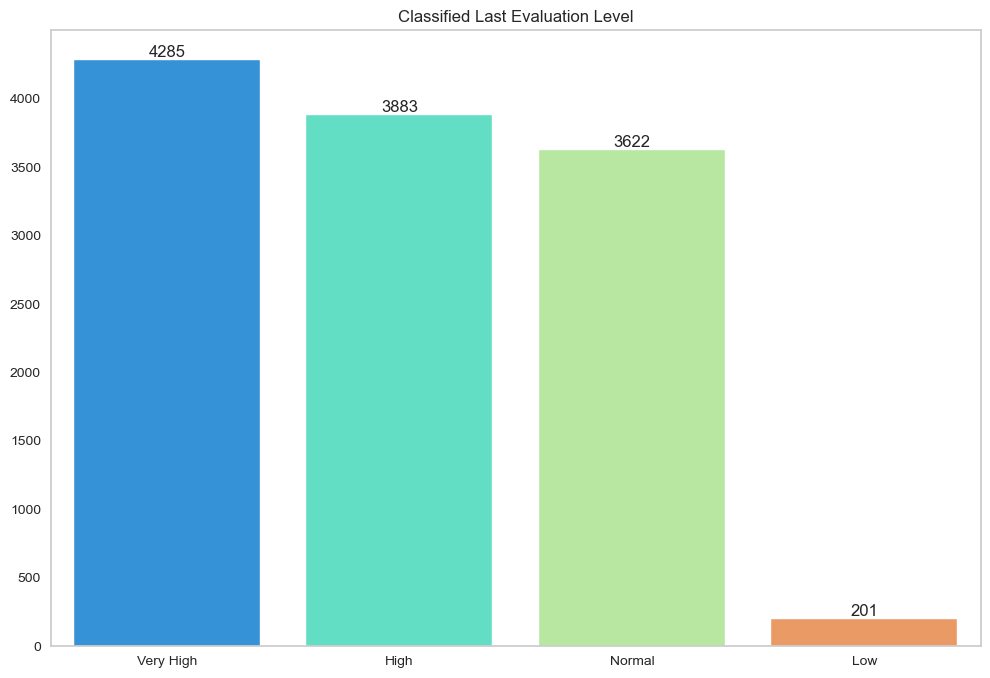

In [81]:
def evaluation(x):
    
    """This function classifies evaluation level!!!"""
    
    if x <= 0.20:
        return "Very Low"
    elif x <= 0.40:
        return "Low"
    elif x <= 0.60:
        return "Normal"
    elif x <= 0.80:
        return "High"
    else:
        return "Very High"
    
df["Last_Evaluation_Class"] = df["last_evaluation"].apply(evaluation)

for i in df.groupby("Last_Evaluation_Class")["left"].count().index:
    print("Total number for people who is in last evaluation class", i.upper(),":", df.groupby("Last_Evaluation_Class")["left"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Classified Last Evaluation Level")
ax = sns.barplot(x=df["Last_Evaluation_Class"].value_counts().index, y=df["Last_Evaluation_Class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()


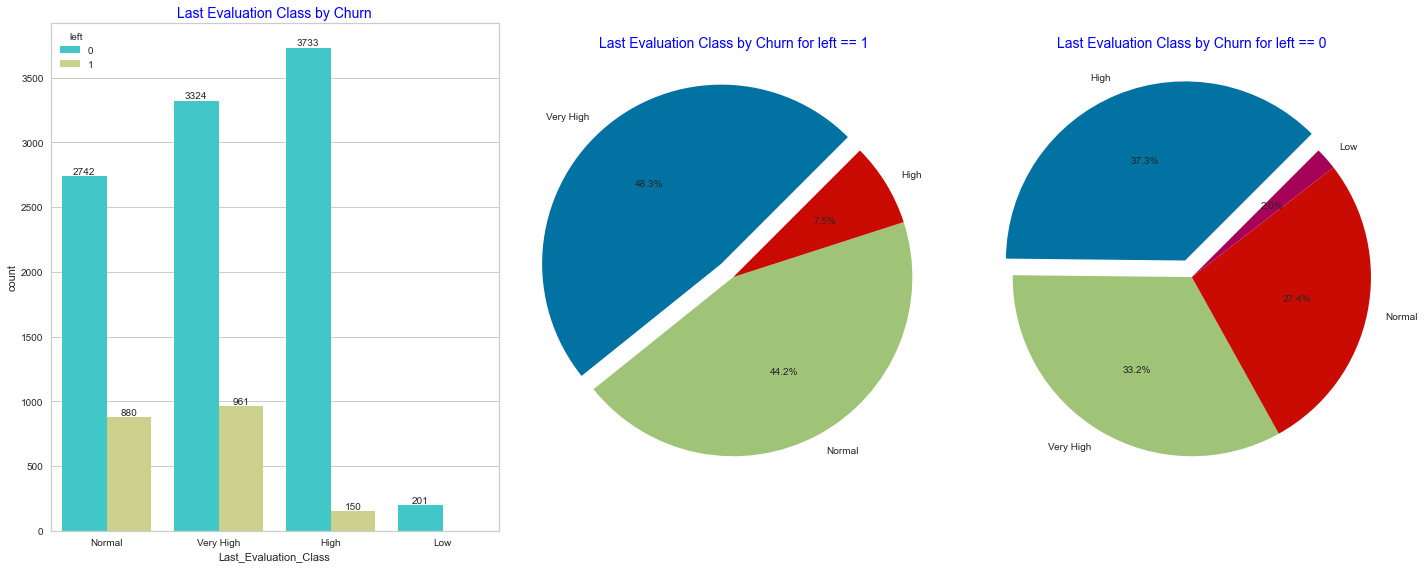

In [76]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
plt.title("Last Evaluation Class by Churn", c="blue", size=14)
ax = sns.countplot(x="Last_Evaluation_Class", hue="left", data=df, palette = 'rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.title("Last Evaluation Class by Churn for left == 1", c="blue", size=14)
plt.pie(df[df.left == 1].Last_Evaluation_Class.value_counts(), labels = df[df.left == 1].Last_Evaluation_Class.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0])
plt.subplot(1,3,3)
plt.title("Last Evaluation Class by Churn for left == 0", c="blue", size=14)
plt.pie(df[df.left == 0].Last_Evaluation_Class.value_counts(), labels = df[df.left == 0].Last_Evaluation_Class.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0])
plt.tight_layout()
plt.show()

### Average Monthly Hours

In [77]:
df.average_monthly_hours.value_counts().sort_values(ascending=False)

156    112
149    112
160    111
151    107
135    104
      ... 
298      5
302      5
297      5
299      5
303      5
Name: average_monthly_hours, Length: 215, dtype: int64

In [78]:
df[df['average_monthly_hours']>=300]

satisfaction_level  last_evaluation  number_project  \
11                  0.11             0.81               6   
22                  0.09             0.95               6   
38                  0.11             0.89               6   
54                  0.10             0.92               7   
57                  0.10             0.81               6   
...                  ...              ...             ...   
1936                0.11             0.97               6   
1939                0.10             0.79               7   
1963                0.09             0.89               7   
1980                0.10             0.79               6   
1985                0.11             0.84               7   

      average_monthly_hours  time_spend_company  work_accident  \
11                      305                   4              0   
22                      304                   4              0   
38                      306                   4              0   
54                      307                   4              0   
57                      309                   4              0   
...                     ...                 ...            ...   
1936                    310                   4              0   
1939                    310                   4              0   
1963                    310                   4              0   
1980                    301                   5              0   
1985                    310                   4              0   

      promotion_last_5years  department  salary  left  underperformer  \
11                        0       sales     low     1               0   
22                        0       sales     low     1               0   
38                        0   technical     low     1               0   
54                        0     support     low     1               0   
57                        0   technical     low     1               0   
...                     ...         ...     ...   ...             ...   
1936                      0  accounting  medium     1               0   
1939                      0          hr  medium     1               0   
1963                      0     support     low     1               0   
1980                      0       RandD  medium     1               0   
1985                      0       sales  medium     1               0   

      unhappy  overachiever  stars  slackers  workaholic  justajob  \
11          1             0      1     False           0         0   
22          1             0      1     False           0         0   
38          1             0      1     False           0         0   
54          1             0      1     False           0         0   
57          1             0      1     False           0         0   
...       ...           ...    ...       ...         ...       ...   
1936        1             0      1     False           0         0   
1939        1             0      1     False           0         0   
1963        1             0      1     False           0         0   
1980        1             0      1     False           0         0   
1985        1             0      1     False           0         0   

      overworked satisfaction_class Last_Evaluation_Class  
11             1           Very Low             Very High  
22             1           Very Low             Very High  
38             1           Very Low             Very High  
54             1           Very Low             Very High  
57             1           Very Low             Very High  
...          ...                ...                   ...  
1936           1           Very Low             Very High  
1939           1           Very Low                  High  
1963           1           Very Low             Very High  
1980           1           Very Low                  High  
1985           1           Very Low             Very High  

[98 rows x 20 columns]

In [79]:
df.groupby("left")["average_monthly_hours"].describe()

count       mean        std    min    25%    50%    75%    max
left                                                                  
0     10000.0  198.94270  45.665507   96.0  162.0  198.0  238.0  287.0
1      1991.0  208.16223  61.295145  126.0  146.0  226.0  262.5  310.0

Total number for people who is in average monthly hours class 0-100 : 50
Total number for people who is in average monthly hours class 100-200 : 5942
Total number for people who is in average monthly hours class 200-300 : 5907
Total number for people who is in average monthly hours class >= 300 : 92


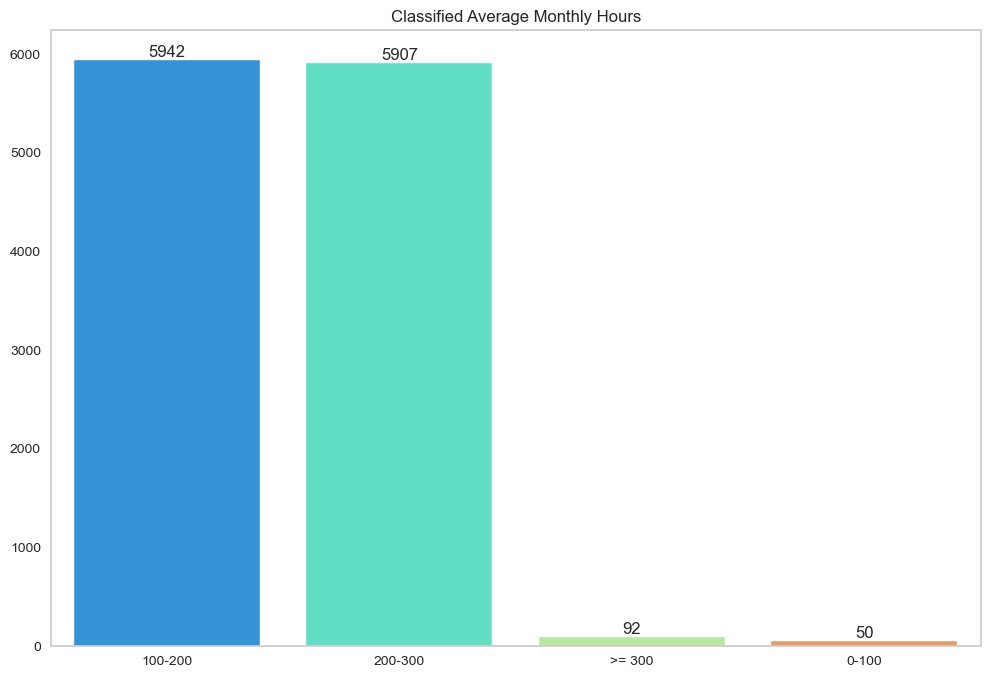

In [82]:
def monthly_hour(x):
    
    """This function classifies average monthly hours!!!"""
    
    if x < 100:
        return "0-100"
    elif x < 200:
        return "100-200"
    elif x <= 300:
        return "200-300"
    elif x >= 300:
        return ">= 300"
    
df["average_monthly_hours_Class"] = df["average_monthly_hours"].apply(monthly_hour)

for i in df.groupby("average_monthly_hours_Class")["left"].count().index:
    print("Total number for people who is in average monthly hours class", i.upper(),":", df.groupby("average_monthly_hours_Class")["left"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Classified Average Monthly Hours")
ax = sns.barplot(x=df["average_monthly_hours_Class"].value_counts().index, y=df["average_monthly_hours_Class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

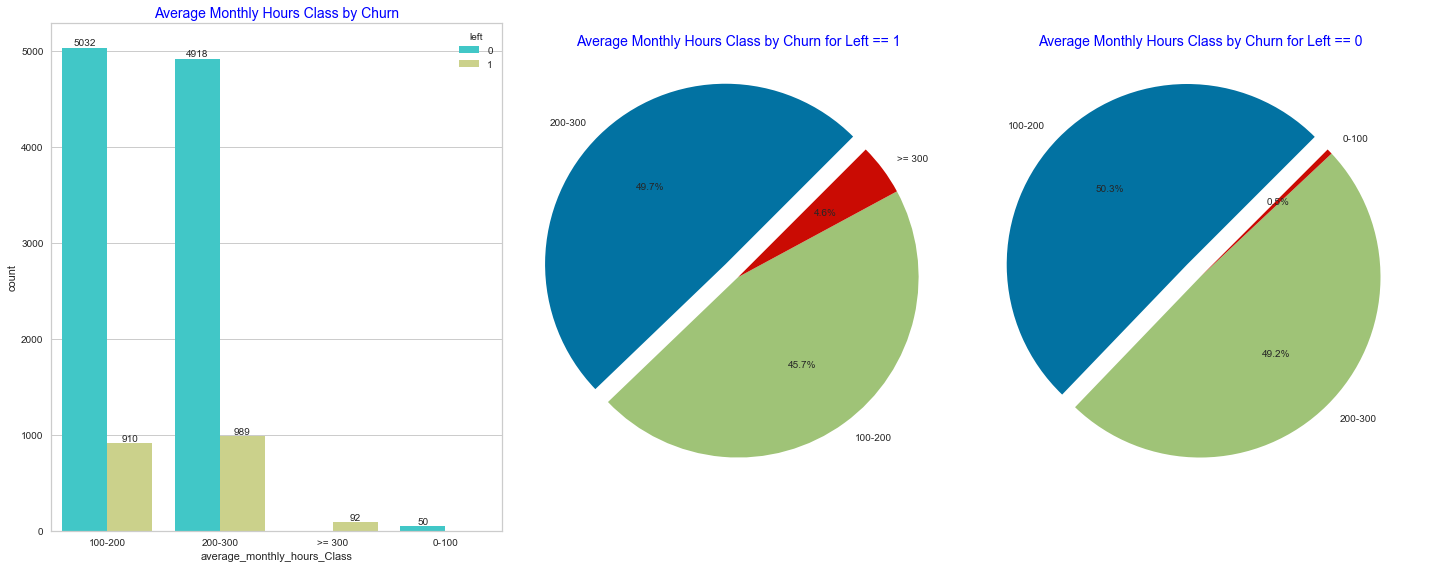

In [81]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
plt.title("Average Monthly Hours Class by Churn", c="blue", size=14)
ax = sns.countplot(x="average_monthly_hours_Class", hue="left", data=df, palette = 'rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.title("Average Monthly Hours Class by Churn for Left == 1", c="blue", size=14)
plt.pie(df[df.left == 1].average_monthly_hours_Class.value_counts(), labels = df[df.left == 1].average_monthly_hours_Class.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0])
plt.subplot(1,3,3)
plt.title("Average Monthly Hours Class by Churn for Left == 0", c="blue", size=14)
plt.pie(df[df.left == 0].average_monthly_hours_Class.value_counts(), labels = df[df.left == 0].average_monthly_hours_Class.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0])
plt.tight_layout()
plt.show()

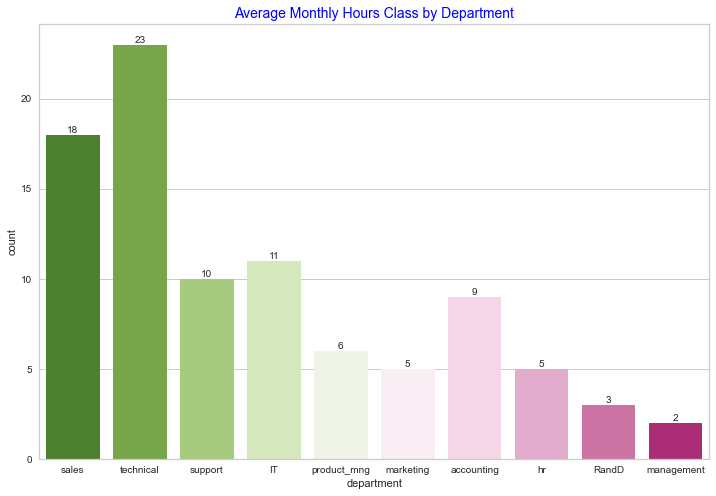

In [82]:
plt.figure(figsize=(12, 8))
plt.title("Average Monthly Hours Class by Department", c="blue", size=14)
ax = sns.countplot(x="department", data=df[df["average_monthly_hours_Class"] == ">= 300"], palette = 'PiYG_r')
ax.bar_label(ax.containers[0])
plt.show()

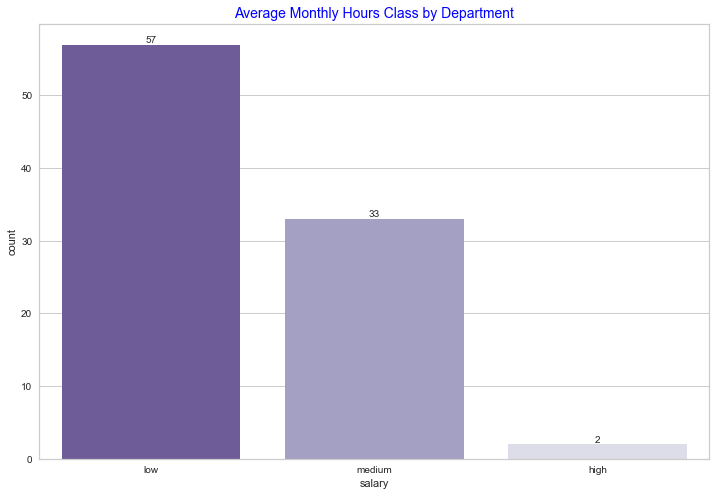

In [83]:
plt.figure(figsize=(12, 8))
plt.title("Average Monthly Hours Class by Department", c="blue", size=14)
ax = sns.countplot(x="salary", data=df[df["average_monthly_hours_Class"] == ">= 300"], palette = 'Purples_r')
ax.bar_label(ax.containers[0])
plt.show()

 People who work more average hours than other employees Technical department has the most number of employee who work more than 300 hours in month. All of these employees churn from their company.

#### Departments

In [84]:
df.groupby("department")["left"].count().loc["IT"]

976

Number of people work in IT department: 976
Number of people work in RANDD department: 694
Number of people work in ACCOUNTING department: 621
Number of people work in HR department: 601
Number of people work in MANAGEMENT department: 436
Number of people work in MARKETING department: 673
Number of people work in PRODUCT_MNG department: 686
Number of people work in SALES department: 3239
Number of people work in SUPPORT department: 1821
Number of people work in TECHNICAL department: 2244


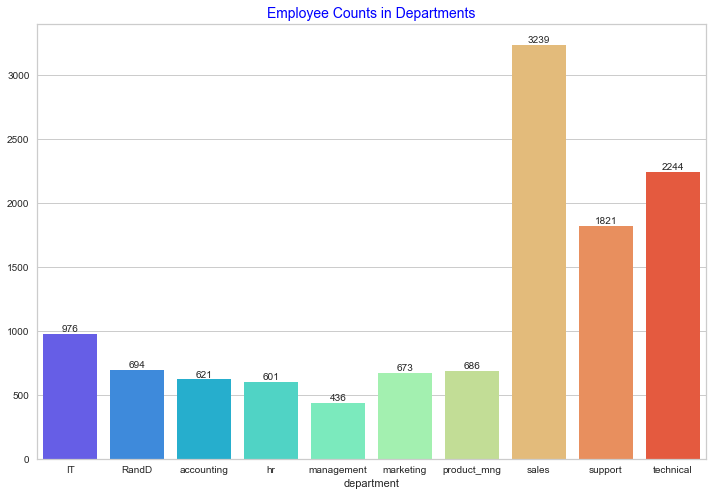

In [85]:
for i in df.groupby("department")["left"].count().index:
    print("Number of people work in", i.upper(),  "department:", df.groupby("department")["left"].count().loc[i])

plt.figure(figsize=(12, 8))
plt.title("Employee Counts in Departments", c="blue", size=14)
ax = sns.barplot(x = df.groupby("department")["left"].count().index, y = df.groupby("department")["left"].count().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

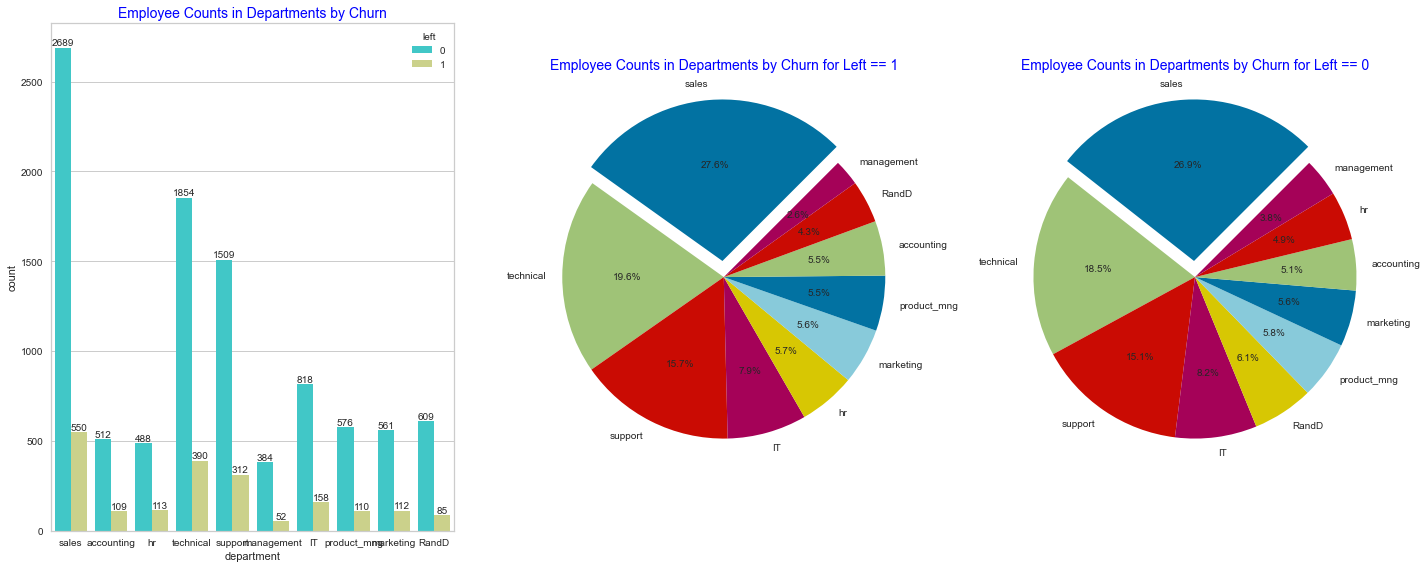

In [86]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
plt.title("Employee Counts in Departments by Churn", c="blue", size=14)
ax = sns.countplot(x="department", hue="left", data=df, palette = 'rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.title("Employee Counts in Departments by Churn for Left == 1", c="blue", size=14)
plt.pie(df[df.left == 1].department.value_counts(), labels = df[df.left == 1].department.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0,0,0,0,0,0])
plt.subplot(1,3,3)
plt.title("Employee Counts in Departments by Churn for Left == 0", c="blue", size=14)
plt.pie(df[df.left == 0].department.value_counts(), labels = df[df.left == 0].department.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0,0,0,0,0,0])
plt.tight_layout()
plt.show()

## Salary

Number of people in  HIGH salary scale: 990
Number of people in  LOW salary scale: 5740
Number of people in  MEDIUM salary scale: 5261


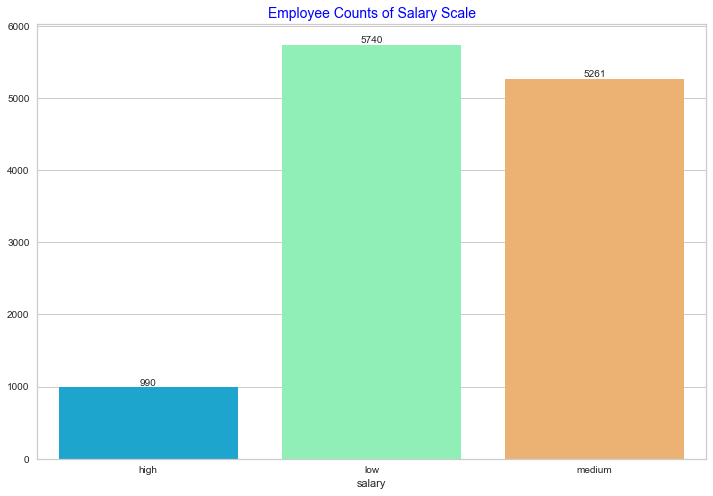

In [88]:
for i in df.groupby("salary")["left"].count().index:
    print("Number of people in ", i.upper(),  "salary scale:", df.groupby("salary")["left"].count().loc[i])### Salary

plt.figure(figsize=(12, 8))
plt.title("Employee Counts of Salary Scale", c="blue", size=14)
ax = sns.barplot(x = df.groupby("salary")["left"].count().index, y = df.groupby("salary")["left"].count().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

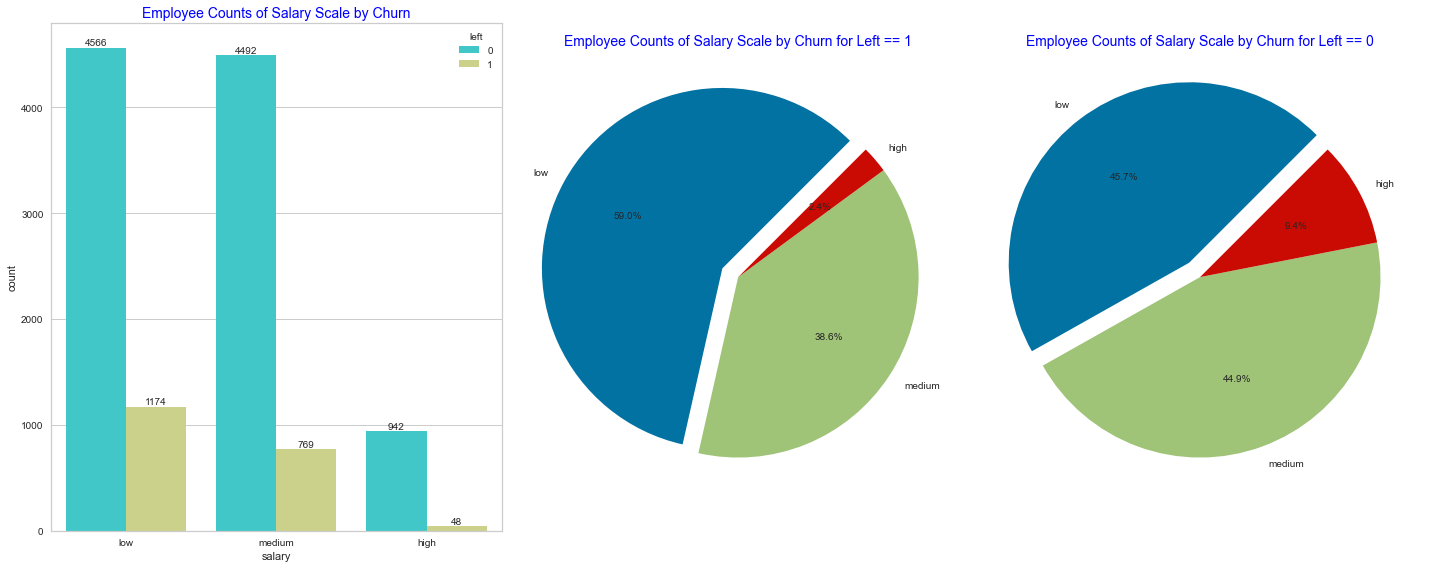

In [89]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title("Employee Counts of Salary Scale by Churn", c="blue", size=14)
ax = sns.countplot(x="salary", hue="left", data=df, palette = 'rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.title("Employee Counts of Salary Scale by Churn for Left == 1", c="blue", size=14)
plt.pie(df[df.left == 1].salary.value_counts(), labels = df[df.left == 1].salary.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0])
plt.subplot(1,3,3)
plt.title("Employee Counts of Salary Scale by Churn for Left == 0", c="blue", size=14)
plt.pie(df[df.left == 0].salary.value_counts(), labels = df[df.left == 0].salary.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0])
plt.tight_layout()
plt.show()

- Employees who works with low salary have higher churn rate.

**Work Accident**

Number of people in  10141
Number of people in  1850


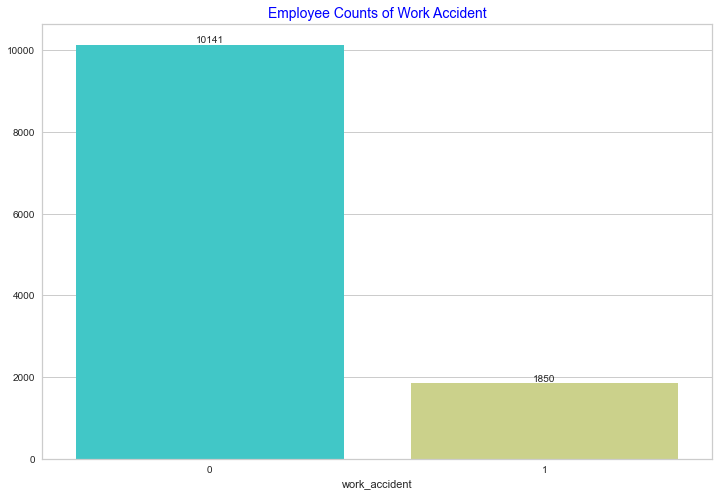

In [91]:
for i in df.groupby("work_accident")["left"].count().index:
    print("Number of people in ", df.groupby("work_accident")["left"].count().loc[i])

plt.figure(figsize=(12, 8))
plt.title("Employee Counts of Work Accident", c="blue", size=14)
ax = sns.barplot(x = df.groupby("work_accident")["left"].count().index, y = df.groupby("work_accident")["left"].count().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

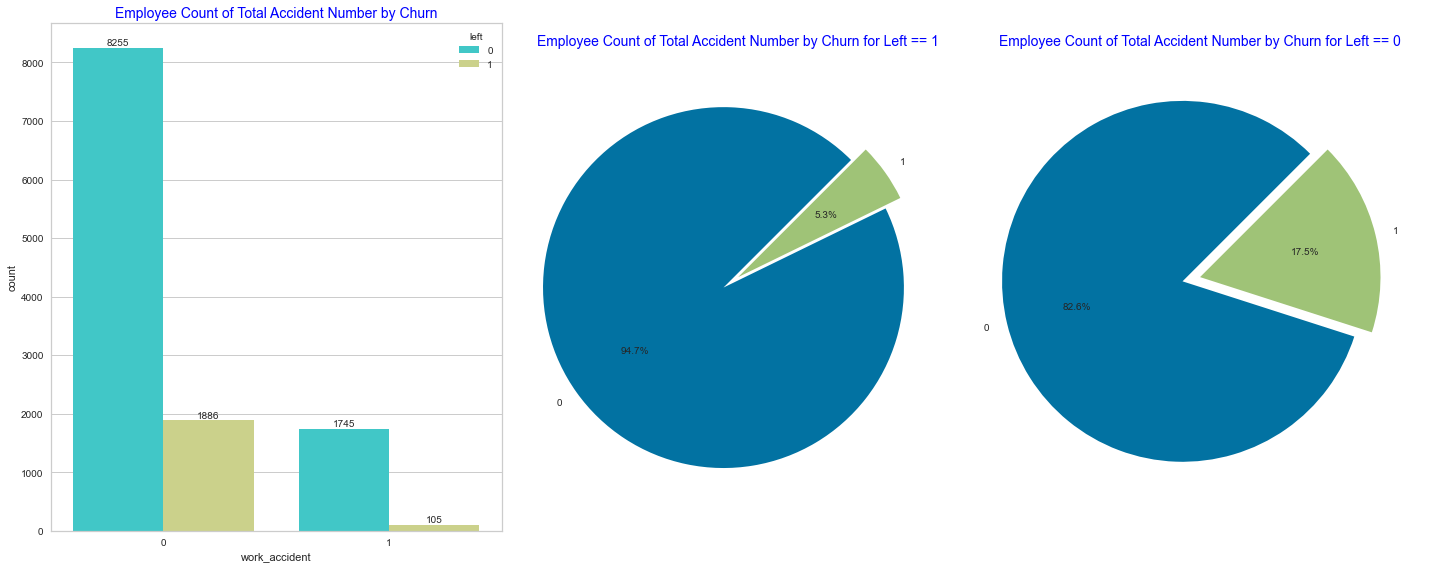

In [92]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
plt.title("Employee Count of Total Accident Number by Churn", c="blue", size=14)
ax = sns.countplot(x="work_accident", hue="left", data=df, palette = 'rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.title("Employee Count of Total Accident Number by Churn for Left == 1", c="blue", size=14)
plt.pie(df[df.left == 1].work_accident.value_counts(), labels = df[df.left == 1].work_accident.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0])
plt.subplot(1,3,3)
plt.title("Employee Count of Total Accident Number by Churn for Left == 0", c="blue", size=14)
plt.pie(df[df.left == 0].work_accident.value_counts(), labels = df[df.left == 0].work_accident.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0])
plt.tight_layout()
plt.show()

- Most of the employees who had a work accident, preferred to stay in company.

#### Promotion Last 5 Years

No number of employee promoted within last 5 years: 11788
Yes number of employee promoted within last 5 years: 203


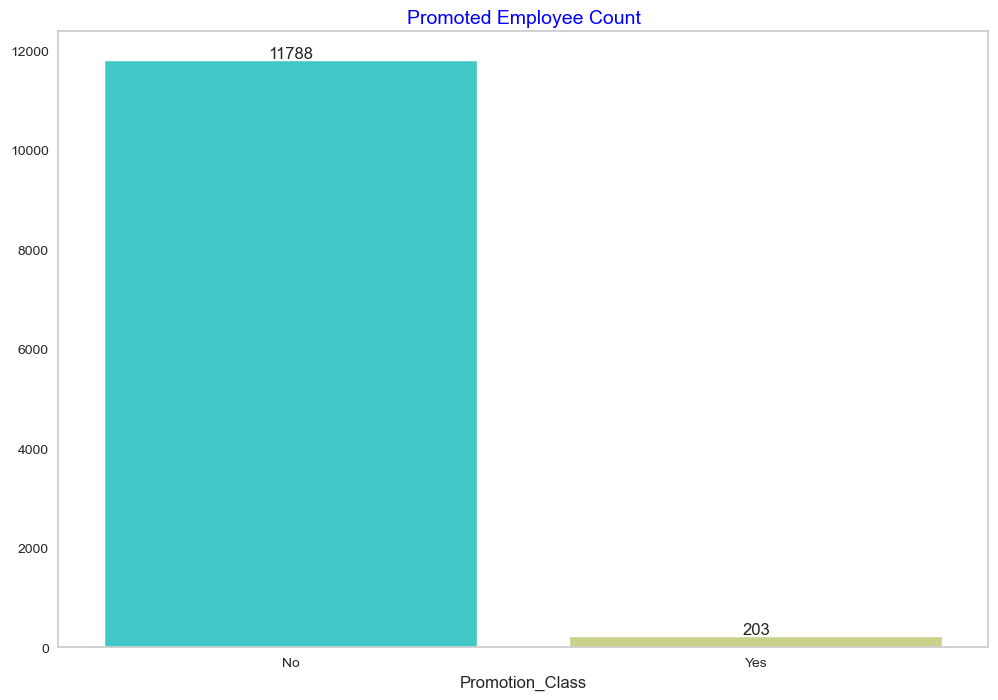

In [83]:
def promotion(x):
    if x == 1:
        return "Yes"
    else:
        return "No"
    
df["Promotion_Class"] = df["promotion_last_5years"].apply(promotion)

for i in df.groupby("Promotion_Class")["left"].count().index:
    print(i, "number of employee promoted within last 5 years:", df.groupby("Promotion_Class")["left"].count().loc[i])

plt.figure(figsize=(12, 8))
plt.title("Promoted Employee Count", c="blue", size=14)
ax = sns.barplot(x = df.groupby("Promotion_Class")["left"].count().index, y = df.groupby("Promotion_Class")["left"].count().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

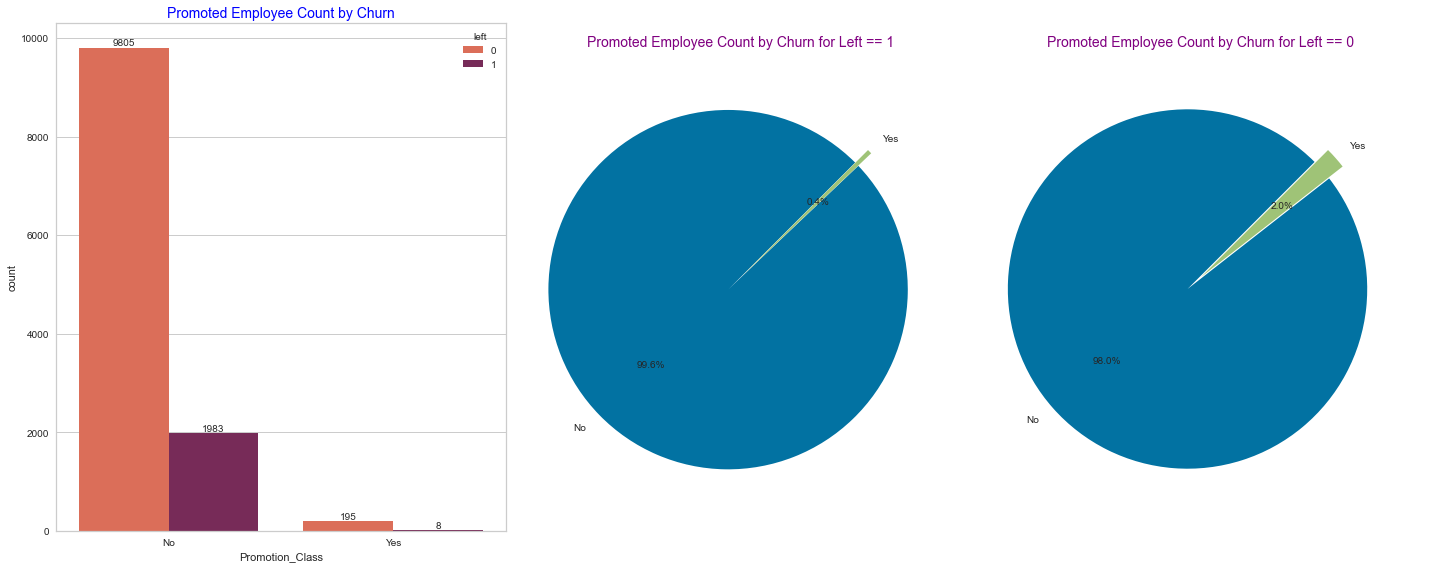

In [95]:
plt.figure(figsize = (20, 8))
plt.subplot(1,3,1)
plt.title("Promoted Employee Count by Churn", c="blue", size=14)
ax = sns.countplot(x="Promotion_Class", hue="left", data=df, palette="rocket_r")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.subplot(1,3,2)
plt.title("Promoted Employee Count by Churn for Left == 1", c="purple", size=14)
plt.pie(df[df.left == 1].Promotion_Class.value_counts(), labels = df[df.left == 1].Promotion_Class.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0])
plt.subplot(1,3,3)
plt.title("Promoted Employee Count by Churn for Left == 0", c="purple", size=14)
plt.pie(df[df.left == 0].Promotion_Class.value_counts(), labels = df[df.left == 0].Promotion_Class.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0])
plt.tight_layout()
plt.show()

- Promoted employees have lower churn rate.

### Subplots of Features

You can use the methods of the matplotlib.

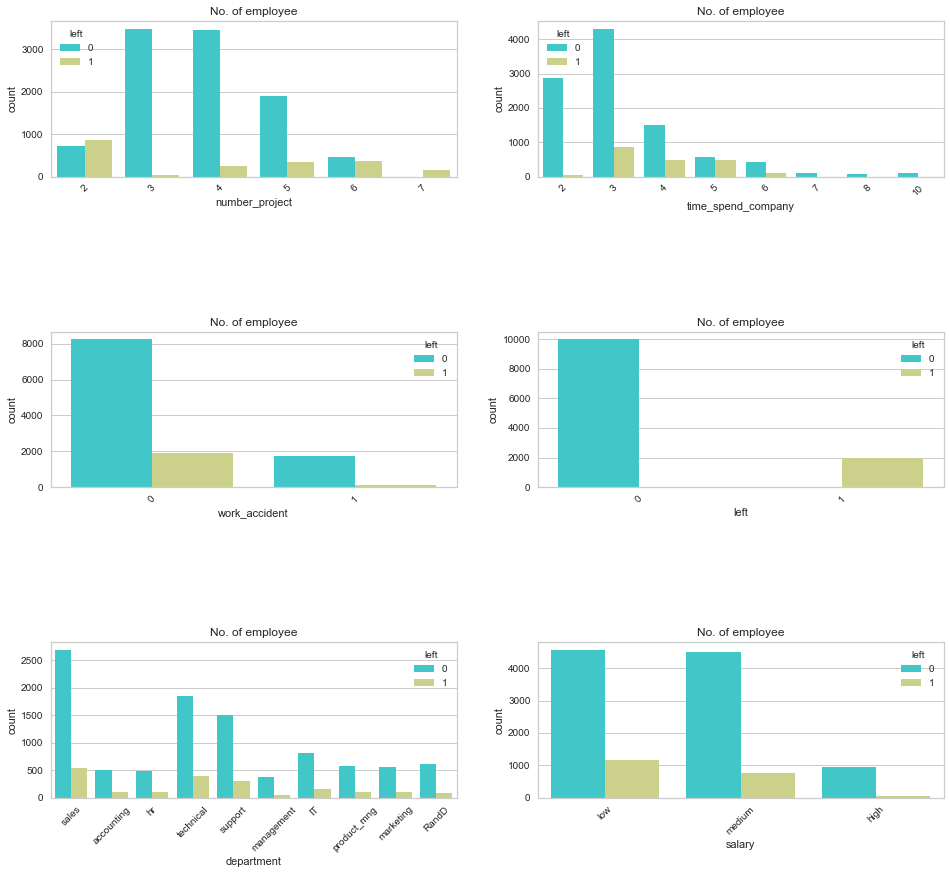

In [97]:
features=['number_project','time_spend_company','work_accident','left','department','salary']
fig=plt.subplots(figsize=(16,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df,hue='left',palette = 'rainbow')
    plt.xticks(rotation=45)
    plt.title("No. of employee")

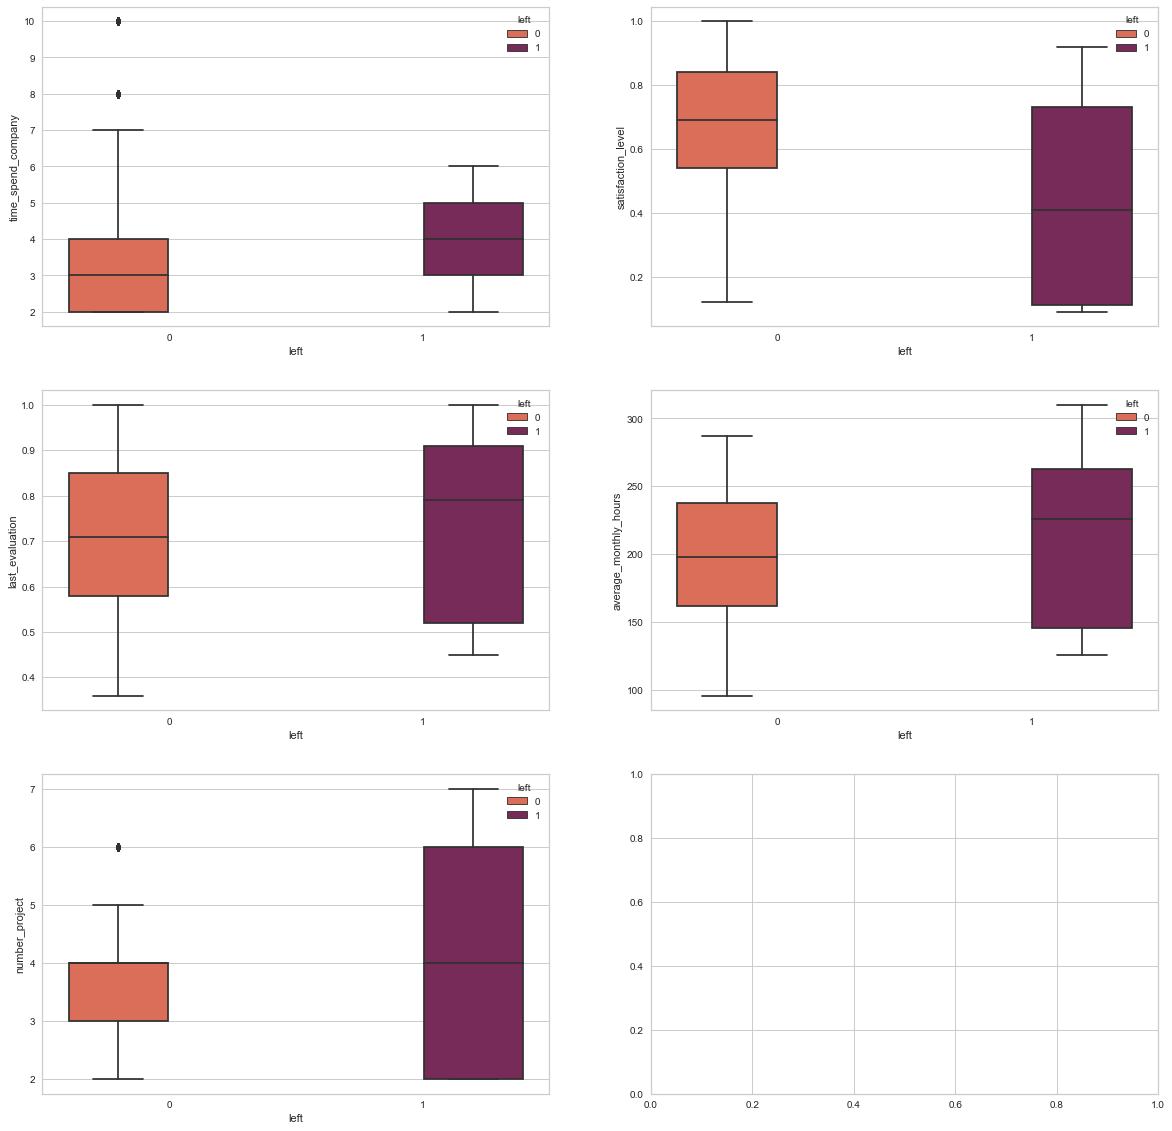

In [98]:
features=['number_project','time_spend_company','work_accident','left', 'promotion_last_5Years','department','salary']
fig, axarr = plt.subplots(3,2 , figsize=(20, 20))
ax= sns.boxplot(y='time_spend_company',x = 'left', hue = 'left',data = df, ax=axarr[0][0],palette = 'rocket_r')
sns.boxplot(y='satisfaction_level',x = 'left', hue = 'left',data = df , ax=axarr[0][1],palette = 'rocket_r')
sns.boxplot(y='last_evaluation',x = 'left', hue = 'left',data = df, ax=axarr[1][0],palette = 'rocket_r')
sns.boxplot(y='average_monthly_hours',x = 'left', hue = 'left',data = df, ax=axarr[1][1],palette = 'rocket_r')
sns.boxplot(y='number_project',x = 'left', hue = 'left',data = df, ax=axarr[2][0],palette = 'rocket_r')
plt.show()

In [86]:
df.drop(["satisfaction_class", "Last_Evaluation_Class", "average_monthly_hours_Class", "Promotion_Class"], 
         axis=1, inplace=True)

In [87]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0               0.380            0.530               2                    157   
1               0.800            0.860               5                    262   
2               0.110            0.880               7                    272   
3               0.720            0.870               5                    223   
4               0.370            0.520               2                    159   

   time_spend_company  work_accident  promotion_last_5years department  \
0                   3              0                      0      sales   
1                   6              0                      0      sales   
2                   4              0                      0      sales   
3                   5              0                      0      sales   
4                   3              0                      0      sales   

   salary  left  underperformer  unhappy  overachiever  stars  slackers  \
0     low     1               1        0             0      0      True   
1  medium     1               0        0             1      1     False   
2  medium     1               0        1             0      1     False   
3     low     1               0        0             1      1     False   
4     low     1               1        0             0      0      True   

   workaholic  justajob  overworked  
0           0         1           0  
1           1         0           0  
2           0         0           1  
3           1         0           0  
4           0         1           0

In [88]:
df.shape

(11991, 18)

In [91]:
df_feature = df.copy()

# 3. Data Pre-Processing

In [94]:
df_feature.to_csv('df_feature.csv', index=False)

In [95]:
df.drop(["underperformer","unhappy","overachiever","stars","slackers","workaholic","justajob","overworked"], 
           axis=1, inplace=True)

In [97]:
df_clean = df.copy()

In [98]:
df_clean.to_csv('df_clean.csv', index=False)

### Encoding


Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

In [40]:
df_clean = pd.read_csv("df_clean.csv")

In [41]:
df1 = df_clean.drop('left', axis = 1)
df1.head(1)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0               0.380            0.530               2                    157   

   time_spend_company  work_accident  promotion_last_5years department salary  
0                   3              0                      0      sales    low

In [42]:
df1 = pd.get_dummies(df1, columns = ['department','salary'], drop_first = True)
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0               0.380            0.530               2                    157   
1               0.800            0.860               5                    262   
2               0.110            0.880               7                    272   
3               0.720            0.870               5                    223   
4               0.370            0.520               2                    159   

   time_spend_company  work_accident  promotion_last_5years  department_RandD  \
0                   3              0                      0                 0   
1                   6              0                      0                 0   
2                   4              0                      0                 0   
3                   5              0                      0                 0   
4                   3              0                      0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  salary_low  salary_medium  
0                   0                     0           1              0  
1                   0                     0           0              1  
2                   0                     0           0              1  
3                   0                     0           1              0  
4                   0                     0           1              0

### Scaling
Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:

Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [25]:
# Min Max scaling
scaler = MinMaxScaler()

In [43]:
#datanın tamamına k-means uygulamıyoruz!! sadece continous featurlarla k-means yapabiliriz.

In [44]:
scale_df1 = df1.iloc[:, [0,1,7]]
scale_df1

satisfaction_level  last_evaluation  department_RandD
0                   0.380            0.530                 0
1                   0.800            0.860                 0
2                   0.110            0.880                 0
3                   0.720            0.870                 0
4                   0.370            0.520                 0
...                   ...              ...               ...
11986               0.900            0.550                 0
11987               0.740            0.950                 0
11988               0.850            0.540                 0
11989               0.330            0.650                 0
11990               0.500            0.730                 0

[11991 rows x 3 columns]

In [26]:
scaler.fit(df1)
scaled_data= scaler.transform(df1)

In [27]:
scaled_data

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.26373626, 0.453125  , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 1.        ,
        0.        ]])

In [28]:
scaled_data = pd.DataFrame(scaled_data,columns=df1.columns)
scaled_data.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0               0.319            0.266           0.000                  0.285   
1               0.780            0.781           0.600                  0.776   
2               0.022            0.812           1.000                  0.822   
3               0.692            0.797           0.600                  0.593   
4               0.308            0.250           0.000                  0.294   

   time_spend_company  work_accident  promotion_last_5years  department_RandD  \
0               0.125          0.000                  0.000             0.000   
1               0.500          0.000                  0.000             0.000   
2               0.250          0.000                  0.000             0.000   
3               0.375          0.000                  0.000             0.000   
4               0.125          0.000                  0.000             0.000   

   department_accounting  department_hr  department_management  \
0                  0.000          0.000                  0.000   
1                  0.000          0.000                  0.000   
2                  0.000          0.000                  0.000   
3                  0.000          0.000                  0.000   
4                  0.000          0.000                  0.000   

   department_marketing  department_product_mng  department_sales  \
0                 0.000                   0.000             1.000   
1                 0.000                   0.000             1.000   
2                 0.000                   0.000             1.000   
3                 0.000                   0.000             1.000   
4                 0.000                   0.000             1.000   

   department_support  department_technical  salary_low  salary_medium  
0               0.000                 0.000       1.000          0.000  
1               0.000                 0.000       0.000          1.000  
2               0.000                 0.000       0.000          1.000  
3               0.000                 0.000       1.000          0.000  
4               0.000                 0.000       1.000          0.000

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [16]:
from DEF import hopkins

In [29]:
scaled_data.shape[0]

11991

In [30]:
hopkins(scaled_data,scaled_data.shape[0])
# hopkins : elimdeki data clusteringe ne kadar yatkın bunu ölçen istatistiksel bir yöntem.
#         :a statistical method that measures how prone to data clustering I have.
# 0.5'den küçükse kümelemeye yatkındır. if it is Less than 0.5,it is prone to clustering
# hopkins 0'a yaklaşıkça datam kümelemeye yatkın diyebiliriz. Datam çok büyük olsaydı, X.shape[0] yerine
# buraya bir  sampling_size da belirtebilirdik.
# her çalıştırıldığında farklı sonuç çıkmasının nedeni; arka planda X'den rastgele gözlemler almasıdır.
#the reason for different results every time it is run; is that it receives random observations from X in the background.

0.08288030985693369

#### !!!!!!The reason for different results every time it is run; is that it receives random observations from X in the background.

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [31]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [32]:
ssd = [] # sum of squared distance

K = range(2,10)
# range'i 2'den başlattığımıza dikkat edelim eğer 1'den başlatırsak elbow'dan optimal k olarak hep 2'yi görürüz.
# inertia  kümelerdeki gözlemlerin centroidlerini  ne sıklıkta çevrelediğini hesaplar.
# inertia'nın sadece küme içine odaklandığına dikkat edelim.
# inertia ne kadar küçükse kümeler kendi içerisinde  centroidlerini o kadar iyi çevrelemiştir.

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    ssd.append(model.inertia_)

In [15]:
# Note that we start range from 2, if we start from 1, we will always see 2 as optimal k from elbow.
# Calculates how often observations in inertia clusters surround their centroids.
# Note That inertia focuses only inside the cluster.
# The smaller the  inertia, the better the clusters surrounded their centroids.

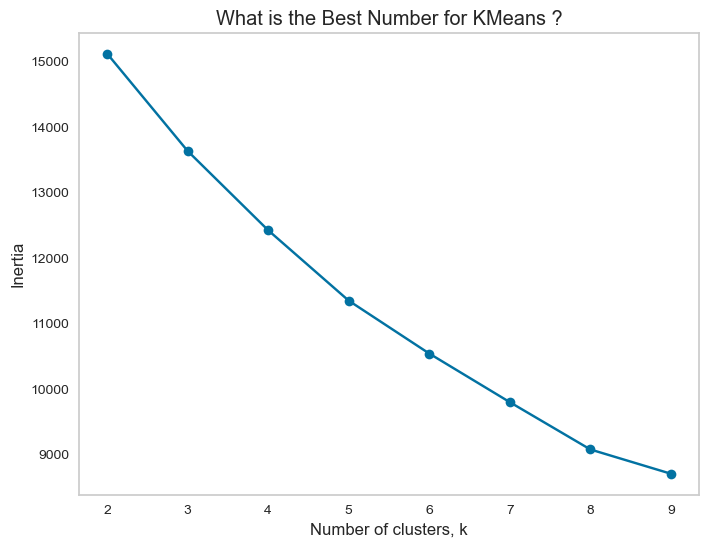

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
plt.plot(K, ssd, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(K)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

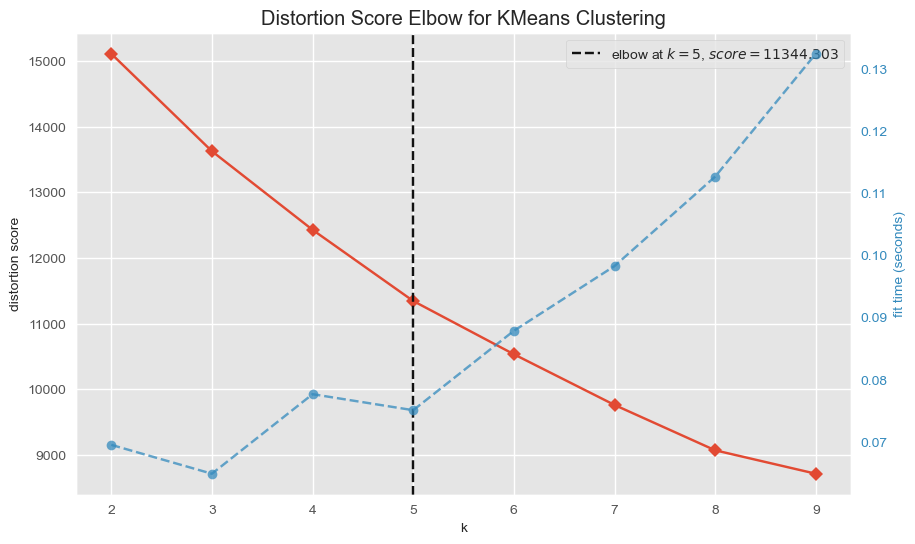

In [36]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(scaled_data)
visu.show();
# yellowbrick sert düşüşün durduğu ilk noktayı değil anlamlı bir düşüşün durduğu noktayı 
#dikkate alarak bir tavsiyede bulunur.
# Ama biz biliyoruz ki elbow method inertia'yı dikkate alarak çalışıyor ideal kümelemede bizim için kümeler arası 
# mesafe de önemliydi.Bundan dolayı Silhouette analysis yaparak optimal k için bir tavsiye de buradan alacağız.

!!!**Yellowbrick marks the point at which a meaningful fall stops, not the first point where a hard fall stops.
But we know that the elbow method works by taking into account the inertia in ideal clustering.
The distance was also important. Therefore, we will also get a recommendation for optimal k by doing Silhouette analysis.**

In [37]:
from sklearn.metrics import silhouette_score
sd =[]

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(scaled_data, model.labels_)}')

# silhouette_score ; yaptığımız kümelemenin kalitesini ölçen bir metriktir, inertia her küme kendi içerisinde centroidi  
# etrafında ne sıklıkta kümelenmiş bunu ölçüyor ( küme içi mesafelere bakıyor yani) Ama bizim ideal clusteringten anlamamız
# gereken bir de maximal inter cluster distance idi  ve silhouette_score işte bu durumu  hesaba katıyor.
# silhouette_score 1'e ne kadar yakınsa kümelemem o kadar kalitelidir.


Silhouette Score for 2 clusters: 0.24293849820807237
Silhouette Score for 3 clusters: 0.19250986825854602
Silhouette Score for 4 clusters: 0.17900983631836617
Silhouette Score for 5 clusters: 0.21836124261590337
Silhouette Score for 6 clusters: 0.2330020256370742
Silhouette Score for 7 clusters: 0.273277336297196
Silhouette Score for 8 clusters: 0.29285588884780916
Silhouette Score for 9 clusters: 0.29586154356070893


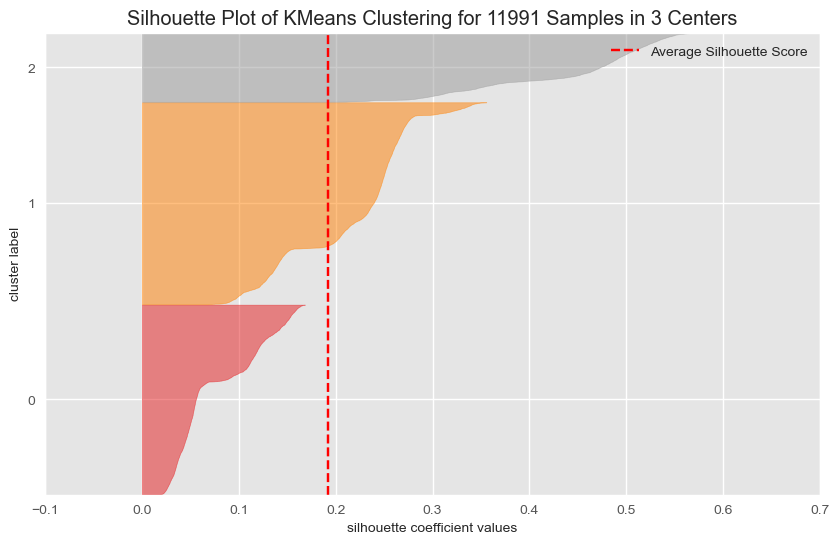

In [38]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters = 3, random_state = 101)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(scaled_data)
visualizer.poof();

In [121]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters = 4, random_state = 101)
visualizer = SilhouetteVisualizer(model4)
visualizer.fit(scaled_data)
visualizer.poof();

AttributeError: 'NoneType' object has no attribute 'split'

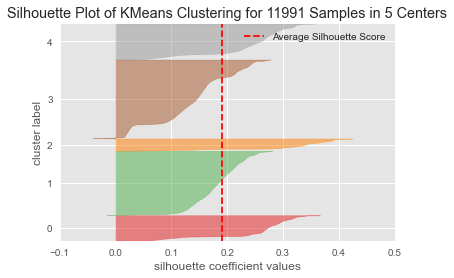

In [174]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters = 5, random_state = 101)
visualizer = SilhouetteVisualizer(model4)
visualizer.fit(scaled_data)
visualizer.poof();

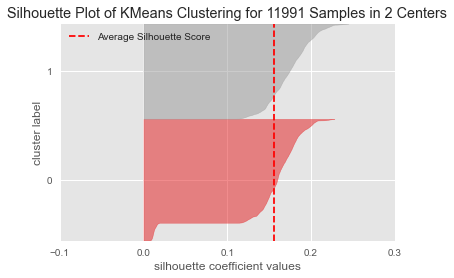

In [176]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model2 = KMeans(n_clusters = 2, random_state = 101)
visualizer = SilhouetteVisualizer(model2)
visualizer.fit(scaled_data)
visualizer.poof();

In [177]:
k_means_model2 = KMeans(n_clusters = 2, random_state = 101)
k_means_model2.fit_predict(scaled_data)
labels = k_means_model2.labels_
labels
# fit yaptıktan sonra doğrudan .labels_ ile de hangi gözlem hangi cluster'a atanmış görebiliriz.

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [178]:
dff=df_clean.copy()

In [179]:
dff['predicted_clusters'] = labels
dff

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11986                0.90             0.55               3   
11987                0.74             0.95               5   
11988                0.85             0.54               3   
11989                0.33             0.65               3   
11990                0.50             0.73               4   

       average_monthly_hours  time_spend_company  promotion_last_5years  \
0                        157                   3                      0   
1                        262                   6                      0   
2                        272                   4                      0   
3                        223                   5                      0   
4                        159                   3                      0   
...                      ...                 ...                    ...   
11986                    259                  10                      1   
11987                    266                  10                      1   
11988                    185                  10                      1   
11989                    172                  10                      1   
11990                    180                   3                      0   

       department  salary  left  underperformer  unhappy  overachiever  stars  \
0           sales     low     1               1        0             0      0   
1           sales  medium     1               0        0             1      1   
2           sales  medium     1               0        1             0      1   
3           sales     low     1               0        0             1      1   
4           sales     low     1               1        0             0      0   
...           ...     ...   ...             ...      ...           ...    ...   
11986  management    high     0               1        0             0      0   
11987  management    high     0               0        0             1      1   
11988  management    high     0               1        0             0      0   
11989   marketing    high     0               0        0             0      0   
11990          IT     low     0               0        0             0      0   

       slackers  workaholic  justajob  overworked  predicted_clusters  
0          True           0         1           0                   0  
1         False           1         0           0                   1  
2         False           0         0           1                   1  
3         False           1         0           0                   0  
4          True           0         1           0                   0  
...         ...         ...       ...         ...                 ...  
11986     False           1         0           0                   0  
11987     False           1         0           0                   0  
11988     False           0         0           0                   0  
11989     False           0         0           0                   0  
11990     False           0         0           0                   0  

[11991 rows x 18 columns]

In [180]:
fig = px.pie(dff, values = dff['predicted_clusters'].value_counts(), 
             names = (dff['predicted_clusters'].value_counts()).index, 
             title = 'Predicted_Clusters Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

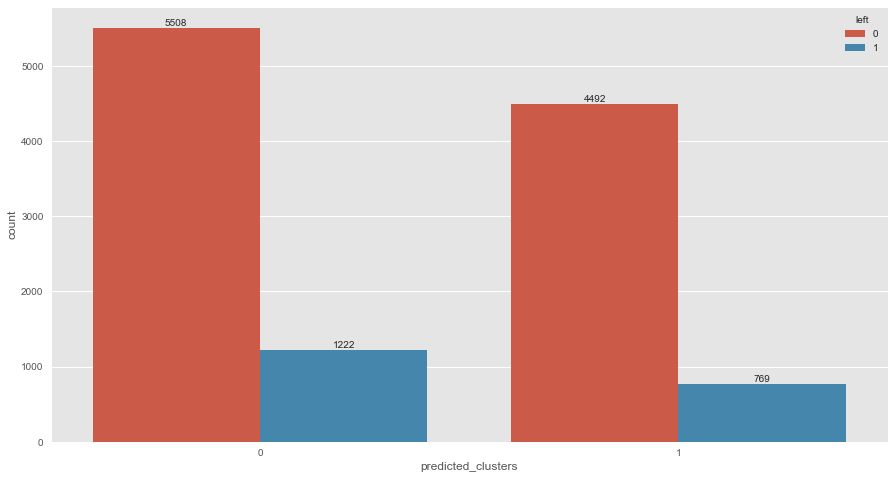

In [181]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = dff, x=dff["predicted_clusters"],hue=dff["left"])
for bar in ax.containers:
  ax.bar_label(bar)

In [182]:
fig = px.pie(dff, values = dff[dff['left']==0]['predicted_clusters'].value_counts(), 
             names = dff[dff['left']==0]['predicted_clusters'].value_counts().index, 
             title = 'Predicted_Clusters and left=0 Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [183]:
fig = px.pie(dff, values = dff[dff['left']==1]['predicted_clusters'].value_counts(), 
             names = dff[dff['left']==1]['predicted_clusters'].value_counts().index, 
             title = 'Predicted_Clusters and left=1 Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

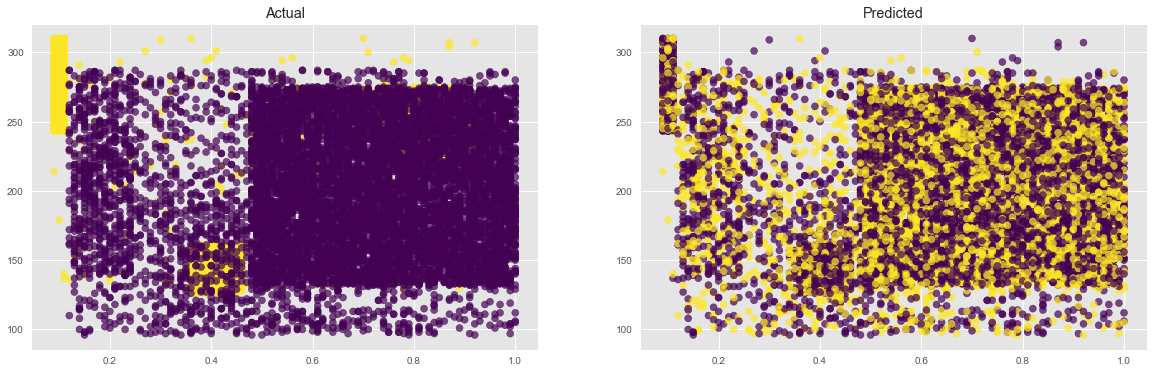

In [184]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(dff["satisfaction_level"], dff["average_monthly_hours"], c = dff.left, cmap = "viridis", alpha=0.7)
plt.title("Actual")

plt.subplot(122)
plt.scatter(dff["satisfaction_level"], dff["average_monthly_hours"], c = dff.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Predicted");

**As seen above, the columns in the data set do not separate from each other. All columns are intertwined with each other. As seen above it is clear that clustering is not a good approach to our dataset.we are going to use classification models to make churn predictions.**

## 5. Model Building

In [3]:
df = pd.read_csv('df_clean.csv')
df.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0               0.380            0.530               2                    157   
1               0.800            0.860               5                    262   
2               0.110            0.880               7                    272   
3               0.720            0.870               5                    223   
4               0.370            0.520               2                    159   

   time_spend_company  work_accident  promotion_last_5years department  \
0                   3              0                      0      sales   
1                   6              0                      0      sales   
2                   4              0                      0      sales   
3                   5              0                      0      sales   
4                   3              0                      0      sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [4]:
df = df.drop('work_accident', axis=1)
df.columns #assosiation a bakalım.

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'promotion_last_5years',
       'department', 'salary', 'left'],
      dtype='object')

In [5]:
X = df.drop('left', axis = 1)
y = df['left']

In [6]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

### Split Data as Train and Test Set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 101)

In [8]:
cat_onehot = ['department']
cat_ordinal = ['salary']
cat_for_salary = ['low', 'medium', 'high']
#df['salary'] = df['salary'].map({'medium': 1, 'high': 2, 'low': 0})

In [9]:
cat2 = X_train.select_dtypes("object").columns
cat2

Index(['department', 'salary'], dtype='object')

In [10]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans1 = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_salary]), cat_ordinal),
                                        remainder='passthrough') #remainder=MinMaxScaler()??

column_trans2 = make_column_transformer((ord_enc, cat2), remainder='passthrough')

# make_column_transformer fonksiyonu featurlara yapılacak dönüşümleri otomotize eder. Bu fonksiyonun içerisine vereceğimiz
# sıralamaya göre featurlara sıra ile dönüşüm uygular.

# (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) kodu ne yapar?
# handle_unknown = "ignore" parametresi ile test setinde geçip train setinde geçmeyen kategorik verilerin tümü
# 0'a dönüştürecek şekilde cat_onehot listesinde bulunan bütün featurlara onehotencoder dönüşümü yapar.

# (OrdinalEncoder(categories=categories), cat_ordinal) kodu ne yapar?
# ilgili featurlara onehotencoder dönüşümü yapıldıktan sonra cat_ordinal listesinde bulunan bütün featurlara categories
# listesi içerisindeki unique kategorik gözlemlerin hiyerarşik sıralamasına göre ordinal encoder dönüşümü yapar.

# remainder='passthrough' ile dönüşüm yapılmayan diğer tüm featurları olduğu gibi bırak anlamına gelir.
# eğer remainder default değeri ile "drop" olarak bırakılırsa dönüşüm yapılmayan tüm featurlar df'den drop edilir.
# remainder= MinMaxScaler() veya StandardScale() yaparsak dönüşüm yapılmayan featurlar haricindeki diğer featurlara
# scale işlem uygulanır.

In [12]:
from sklearn.pipeline import make_pipeline
pipelines = {
       'l1': make_pipeline(column_trans1, StandardScaler(), 
             LogisticRegression(penalty='l1', solver='liblinear', random_state=123)),
       'l2': make_pipeline(column_trans1, StandardScaler(), 
             LogisticRegression(penalty='l2', random_state=123)),
       'rf': make_pipeline(column_trans2,
             RandomForestClassifier(random_state=123)),
       'gb': make_pipeline(column_trans2,
             GradientBoostingClassifier(random_state=123)),
       'knn': make_pipeline(column_trans1, StandardScaler(),
             KNeighborsClassifier()),
       'xgb': make_pipeline(column_trans2,
              XGBClassifier(random_state=123))
            }



In [13]:
l1_hyperparameters = {'logisticregression__C' : [0.001, 0.005, 0.01, 
                       0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
                     }
l2_hyperparameters = {'logisticregression__C' : 
                       [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 
                        1, 5, 10, 50, 100, 500, 1000]
                     }

In [14]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10]
    }

In [15]:
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
    }

In [16]:
knn_hyperparameters = {
    'kneighborsclassifier__n_neighbors': range(1,25) ,
    'kneighborsclassifier__leaf_size': [15, 30, 40] ,
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1,2]
    }

In [17]:
xgb_hyperparameters = {
    'xgbclassifier__n_estimators': [50, 100, 150],
    'xgbclassifier__learning_rate': [0.05, 0.1, 0.15],
    'xgbclassifier__max_depth': [1, 2, 3],
    'xgbclassifier__subsample': [1,2],
    'xgbclassifier__colsample_bytree': [0.8, 1]
    }

In [18]:
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'knn' : knn_hyperparameters,
    'xgb' : xgb_hyperparameters
 }

In [20]:
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, 
                         hyperparameters[name], 
                         cv=10, 
                         n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model

In [21]:
for name, model in fitted_models.items():
    print(name, model.best_score_)
     

l1 0.8411765707474885
l2 0.8364098416482207
rf 0.98391509166241
gb 0.9836758612861118
knn 0.9616331800896759
xgb 0.9833187184289688


In [23]:
for name, model in fitted_models.items():
    print('Results for:', name)
    
    # obtain predictions
    pred = fitted_models[name].predict(X_test)
    cm = confusion_matrix(y_test, pred) 
     # precision
    precision = cm[1][1]/(cm[0][1]+cm[1][1])
    print('Precision:', precision)
    
    # recall
    recall = cm[1][1]/(cm[1][0]+cm[1][1])
    print('Recall:', recall)
    
    # F1_score
    print('F1:', f1_score(y_test, pred))
    print("")

Results for: l1
Precision: 0.6513157894736842
Recall: 0.1658291457286432
F1: 0.26435246995994655

Results for: l2
Precision: 0.5751633986928104
Recall: 0.1474036850921273
F1: 0.23466666666666666

Results for: rf
Precision: 0.9909420289855072
Recall: 0.916247906197655
F1: 0.9521322889469103

Results for: gb
Precision: 0.968421052631579
Recall: 0.9246231155778895
F1: 0.9460154241645244

Results for: knn
Precision: 0.867862969004894
Recall: 0.8911222780569514
F1: 0.8793388429752067

Results for: xgb
Precision: 0.9648506151142355
Recall: 0.9195979899497487
F1: 0.9416809605488851



Results for: l1


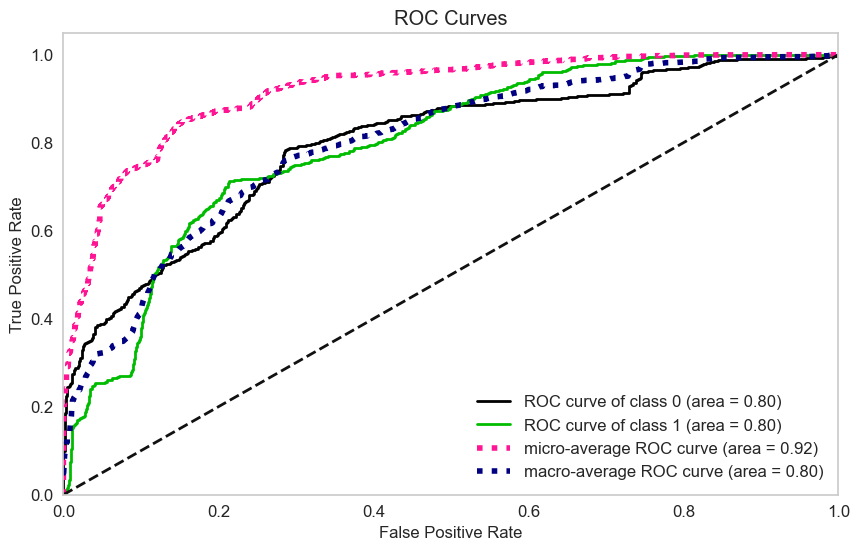

[[2948   53]
 [ 498   99]]
Accuracy: 0.8468593663146192
Precision: 0.6513157894736842
Recall: 0.1658291457286432
F1: 0.26435246995994655


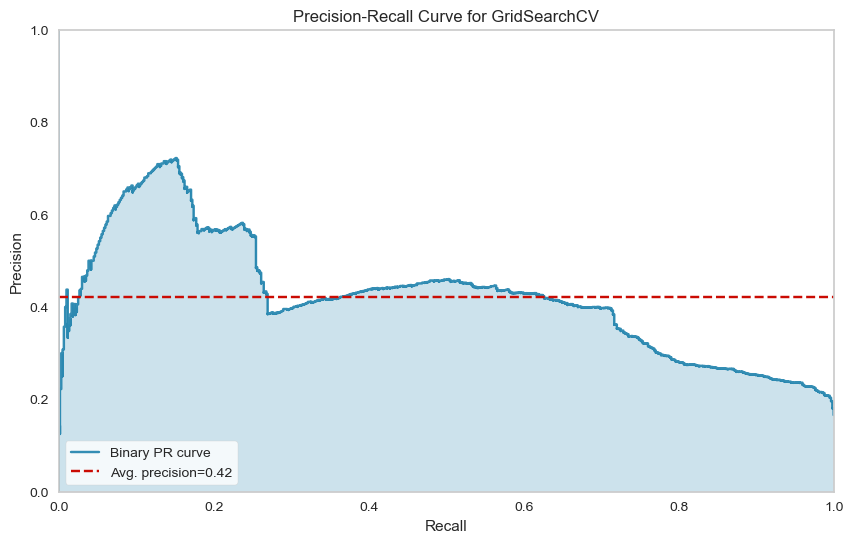

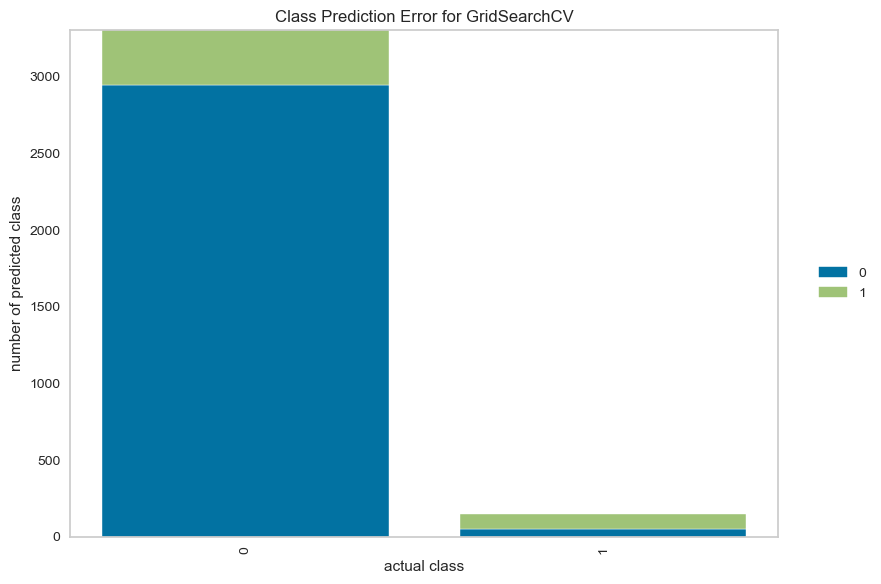

Results for: l2


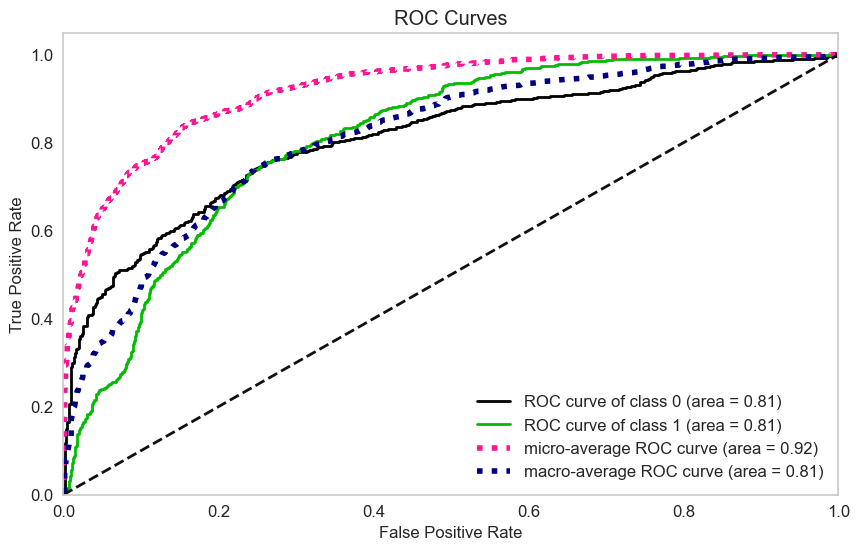

[[2936   65]
 [ 509   88]]
Accuracy: 0.8404669260700389
Precision: 0.5751633986928104
Recall: 0.1474036850921273
F1: 0.23466666666666666


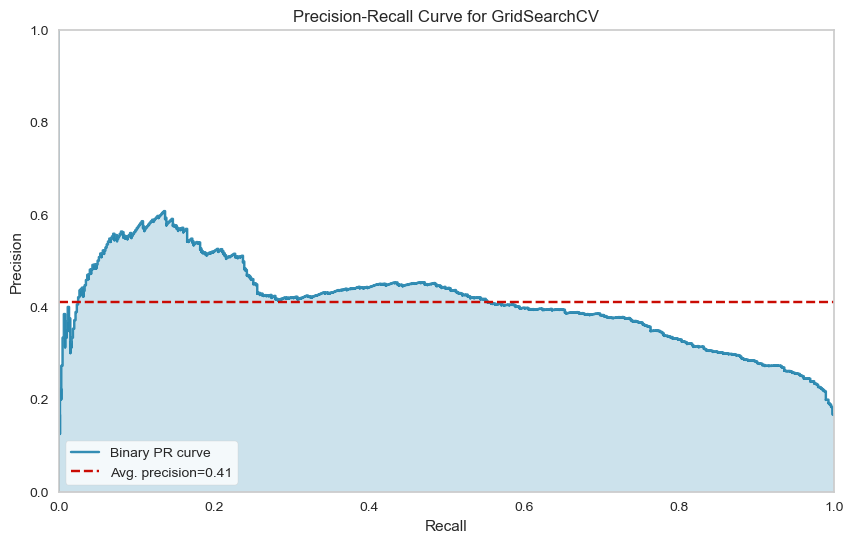

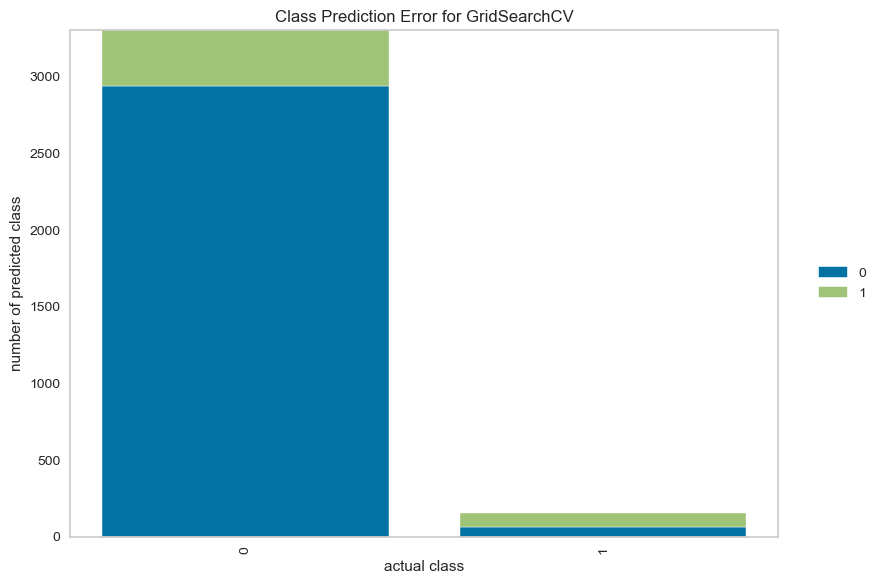

Results for: rf


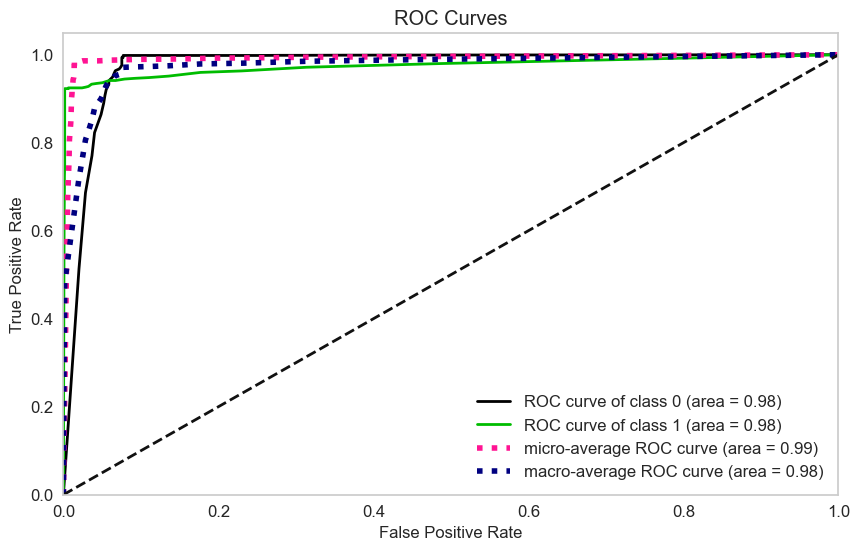

[[2996    5]
 [  50  547]]
Accuracy: 0.9847137298499167
Precision: 0.9909420289855072
Recall: 0.916247906197655
F1: 0.9521322889469103


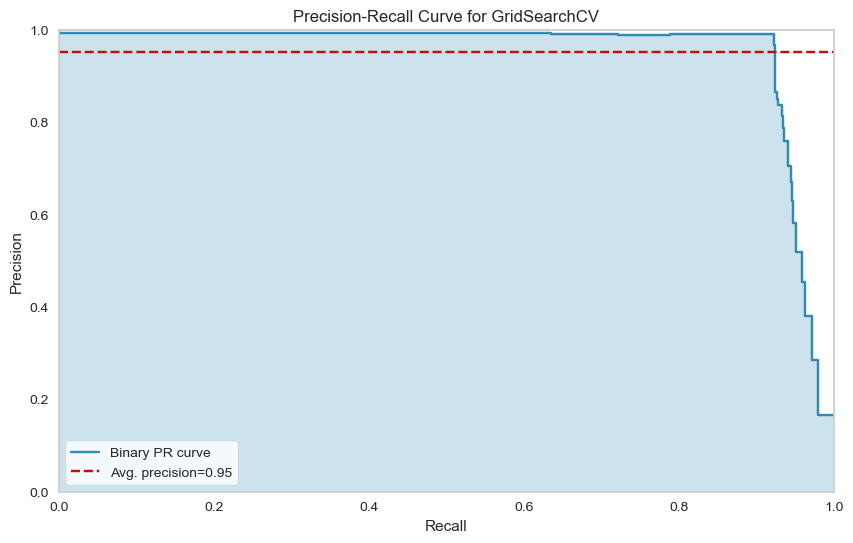

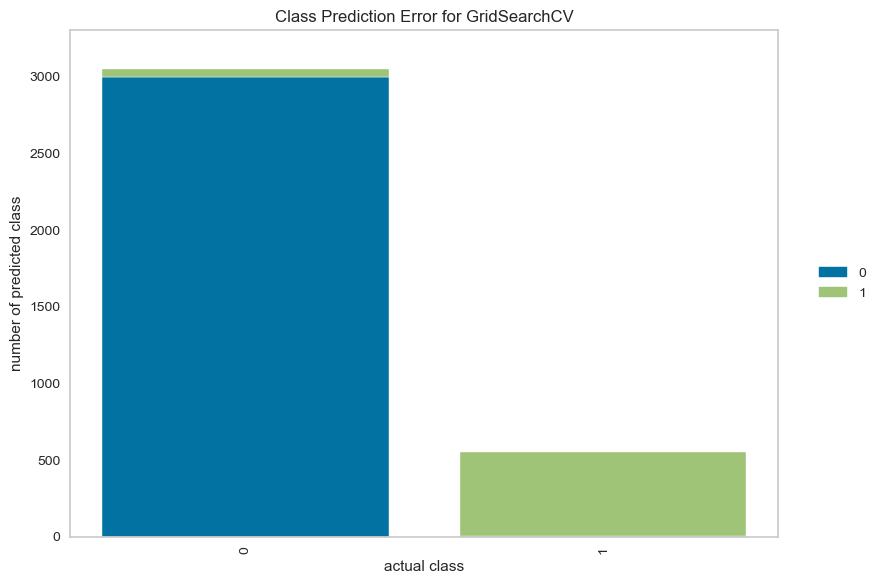

Results for: gb


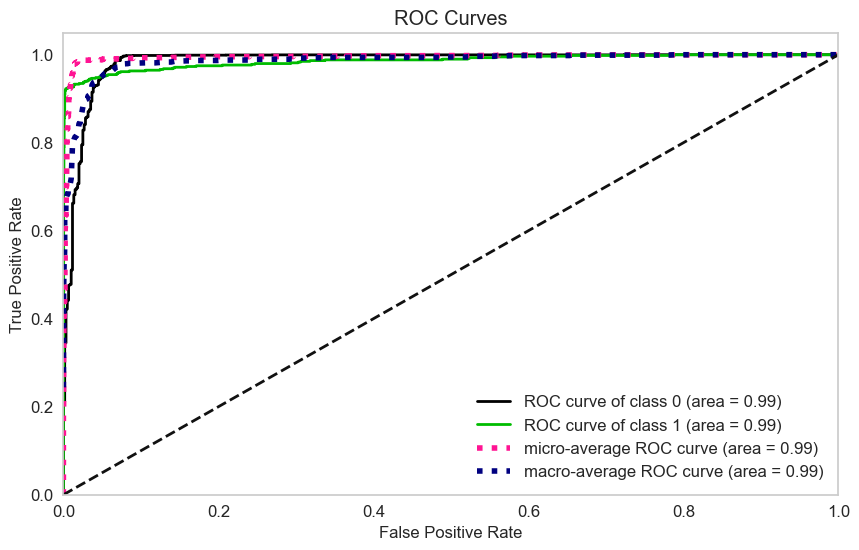

[[2983   18]
 [  45  552]]
Accuracy: 0.9824902723735408
Precision: 0.968421052631579
Recall: 0.9246231155778895
F1: 0.9460154241645244


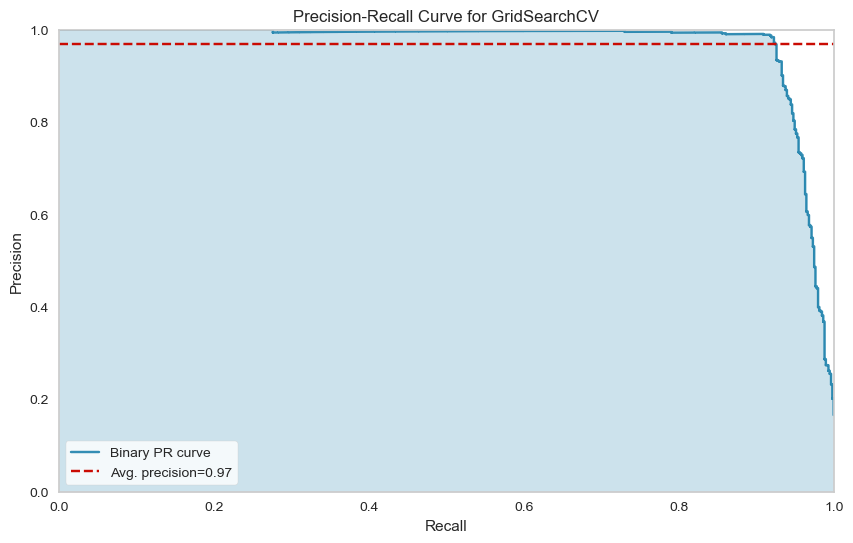

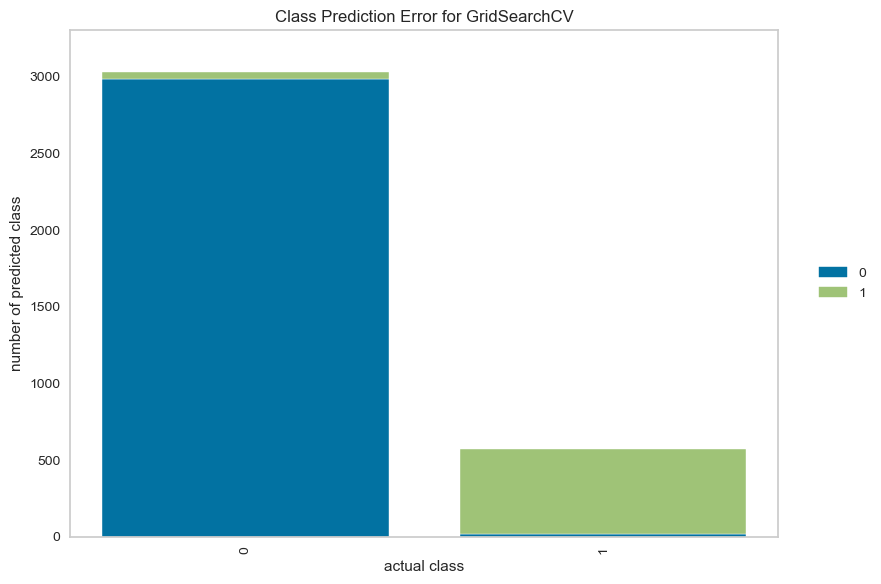

Results for: knn


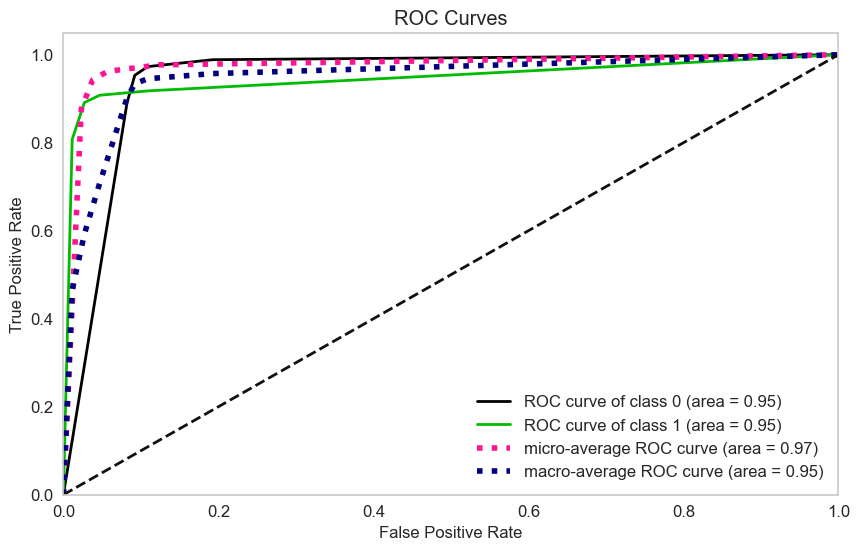

[[2920   81]
 [  65  532]]
Accuracy: 0.9594219010561423
Precision: 0.867862969004894
Recall: 0.8911222780569514
F1: 0.8793388429752067


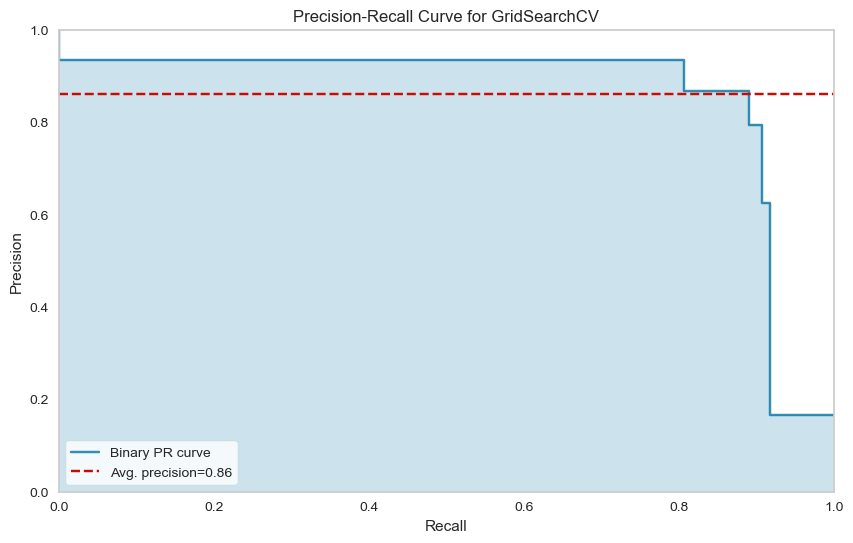

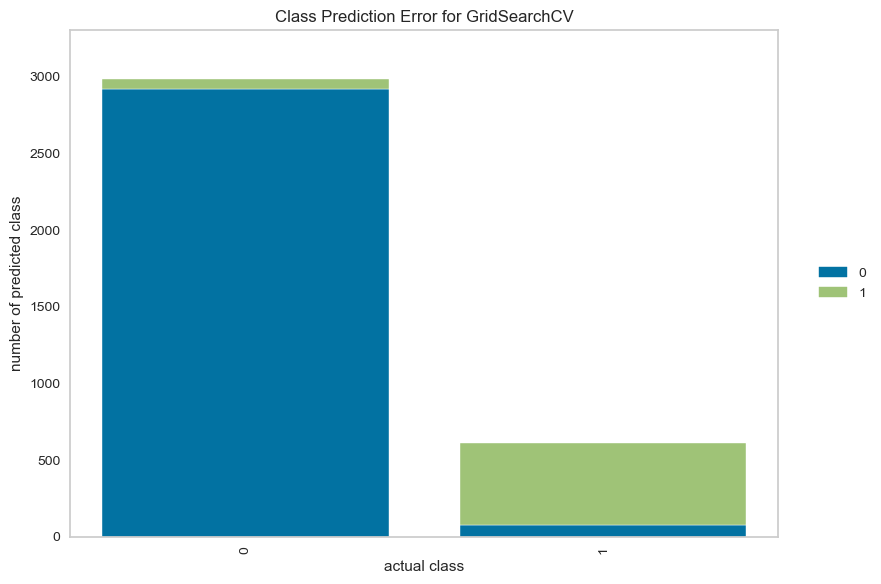

Results for: xgb


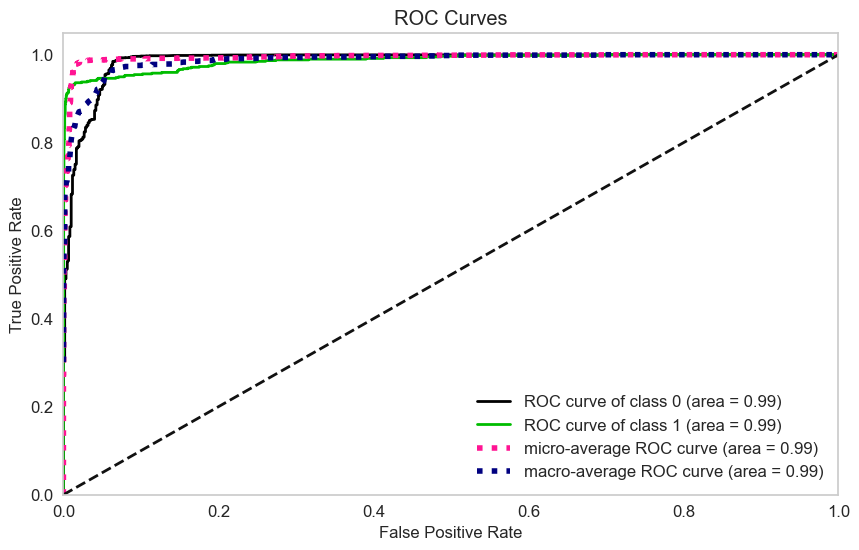

[[2981   20]
 [  48  549]]
Accuracy: 0.981100611450806
Precision: 0.9648506151142355
Recall: 0.9195979899497487
F1: 0.9416809605488851


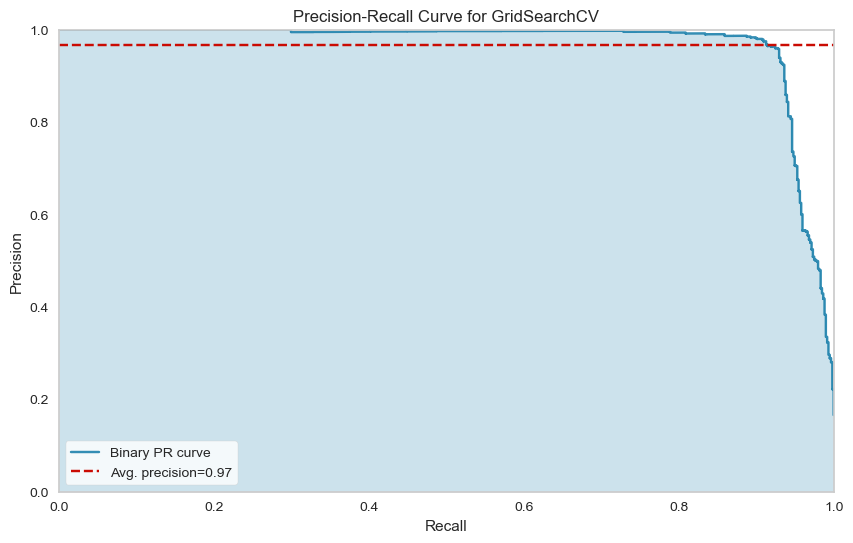

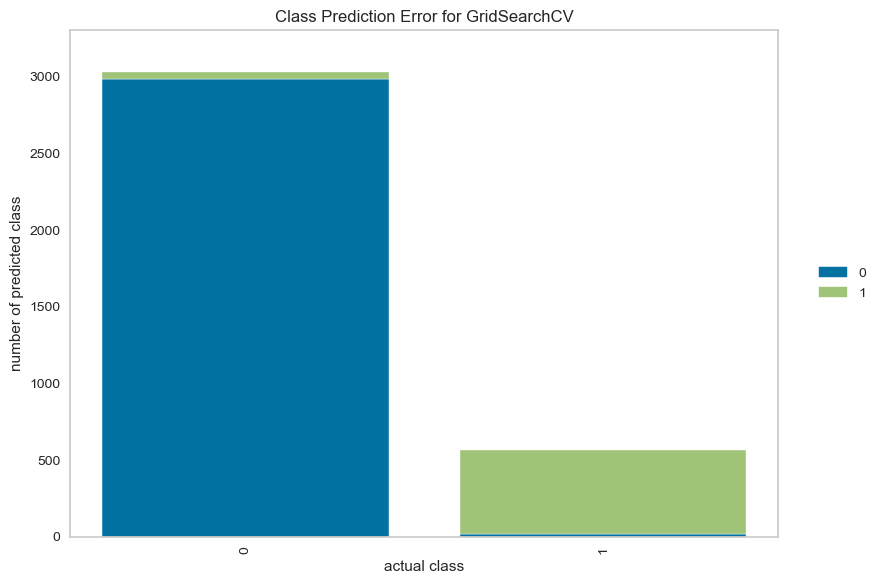

In [24]:
for name, model in fitted_models.items():
    print('Results for:', name)
    
    # obtain predictions
    pred = fitted_models[name].predict(X_test)

    #proba
    y_pred_proba = fitted_models[name].predict_proba(X_test)
    plot_roc(y_test, y_pred_proba)
    plt.show();

    # confusion matrix
    cm = confusion_matrix(y_test, pred)
    print(cm)
    # accuracy score
    print('Accuracy:', accuracy_score(y_test, pred))
    
    # precision
    precision = cm[1][1]/(cm[0][1]+cm[1][1])
    print('Precision:', precision)
    
    # recall
    recall = cm[1][1]/(cm[1][0]+cm[1][1])
    print('Recall:', recall)
    
    # F1_score
    print('F1:', f1_score(y_test, pred))
    
    # obtain prediction probabilities
    pred = fitted_models[name].predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    #precision_recall-curve
    viz = PrecisionRecallCurve(fitted_models[name])
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show();
    

    print("")
    visualizer = ClassPredictionError(fitted_models[name])
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.poof();
    
    #plot_confusion_matrix(fitted_models[name], X_test, y_test, cmap="plasma")

    #roc classları ne kadar iyi ayırabildiğimize bakar. 1 e yaklaştıkça ayırma iyleşir

#### Her bir model için precision, recall ve f1 scoreları değerlendirildiğinde en iyi sorelara **gb** da ulaştığımızı görüyoruz. Böylece best model olarak  **gb** şeçeceğiz.

## The Best Model  GB 

In [25]:
print(fitted_models['gb'].best_params_)

{'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 100}


In [136]:
#pip install scikit-plot

In [27]:
#gridsearch sonucu elde edilen en iyi hyperparametreler ile modelimizi yeniden kuruyoruz.
#We rebuilding our model with the best hyperparameters obtained as a result of gridsearch.

operations = [("OneHot_Ordinal_Encoder", column_trans2), 
              ("gb", GradientBoostingClassifier(learning_rate=0.1, 
                                                max_depth=5,
                                                n_estimators=100,
                                                random_state=123))]

gb_model_final = Pipeline(steps=operations)

gb_model_final.fit(X_train,y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['department', 'salary'], dtype='object'))])),
                ('gb',
                 GradientBoostingClassifier(max_depth=5, random_state=123))])

In [28]:
fitted_models["gb"]

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['department', 'salary'], dtype='object'))])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.05,
                                                                       0.1,
                                                                       0.2],
                         'gradientboostingclassifier__max_depth': [1, 3, 5],
                         'gradientboostingclassifier__n_estimators': [100,
                                                                      200]})

[[2983   18]
 [  45  552]]
Test_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.97      0.92      0.95       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.99      0.95      0.97      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



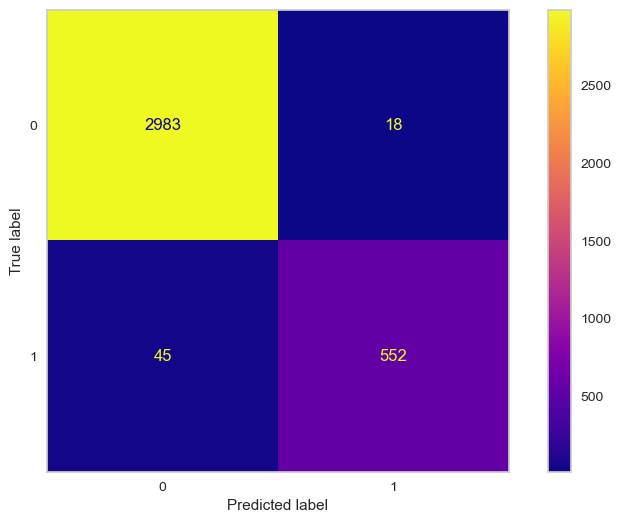

In [29]:
eval(gb_model_final, X_train, X_test)

### Cross Validation For Final GB Model

In [30]:
model = gb_model_final
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

#as we see we don't have overfitting

test_precision    0.974
train_precision   0.993
test_recall       0.926
train_recall      0.951
test_f1           0.949
train_f1          0.971
dtype: float64

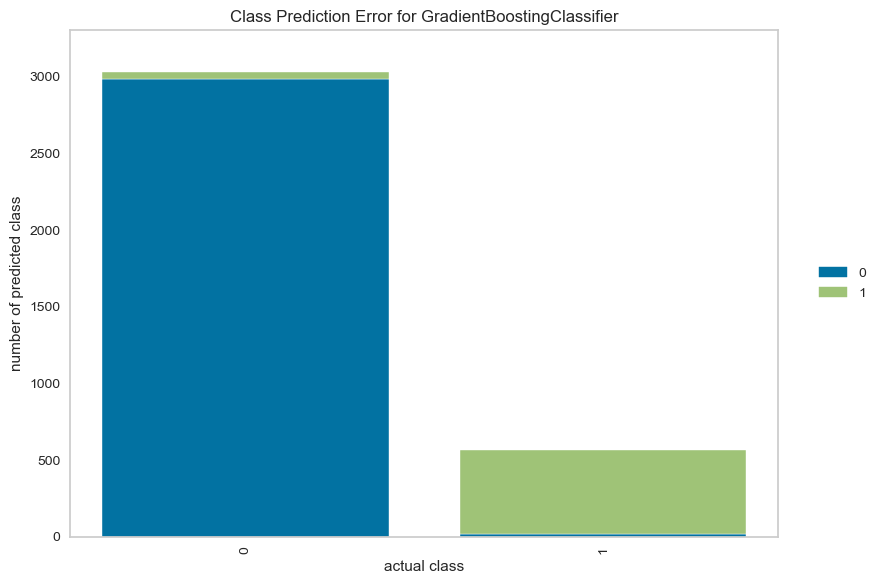

In [31]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(gb_model_final)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

### Feature importances For GB

In [32]:
features =gb_model_final["OneHot_Ordinal_Encoder"].get_feature_names_out()
features

array(['ordinalencoder__department', 'ordinalencoder__salary',
       'remainder__satisfaction_level', 'remainder__last_evaluation',
       'remainder__number_project', 'remainder__average_monthly_hours',
       'remainder__time_spend_company',
       'remainder__promotion_last_5years'], dtype=object)

In [33]:
pd.DataFrame(gb_model_final["OneHot_Ordinal_Encoder"].fit_transform(X_train), columns=features).head()

ordinalencoder__department  ordinalencoder__salary  \
0                       7.000                   2.000   
1                       3.000                   1.000   
2                       7.000                   1.000   
3                       7.000                   2.000   
4                       8.000                   1.000   

   remainder__satisfaction_level  remainder__last_evaluation  \
0                          0.880                       0.510   
1                          0.350                       0.520   
2                          0.380                       0.570   
3                          0.760                       0.600   
4                          0.770                       0.940   

   remainder__number_project  remainder__average_monthly_hours  \
0                      3.000                           211.000   
1                      5.000                           244.000   
2                      2.000                           140.000   
3                      5.000                           279.000   
4                      5.000                           226.000   

   remainder__time_spend_company  remainder__promotion_last_5years  
0                          7.000                             0.000  
1                          3.000                             0.000  
2                          3.000                             0.000  
3                          2.000                             0.000  
4                          6.000                             0.000

In [35]:
new_features = [i.replace("onehotencoder__","").replace("remainder__", "") for i in features]
new_features

['ordinalencoder__department',
 'ordinalencoder__salary',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'promotion_last_5years']

In [36]:
df_f_i = pd.DataFrame(data =gb_model_final["gb"].feature_importances_, index=new_features, #index=X.columns
                      columns = ["Feature Importance"])
df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)

df_f_i

Feature Importance
satisfaction_level                       0.493
last_evaluation                          0.164
number_project                           0.133
time_spend_company                       0.124
average_monthly_hours                    0.082
ordinalencoder__department               0.002
ordinalencoder__salary                   0.002
promotion_last_5years                    0.000

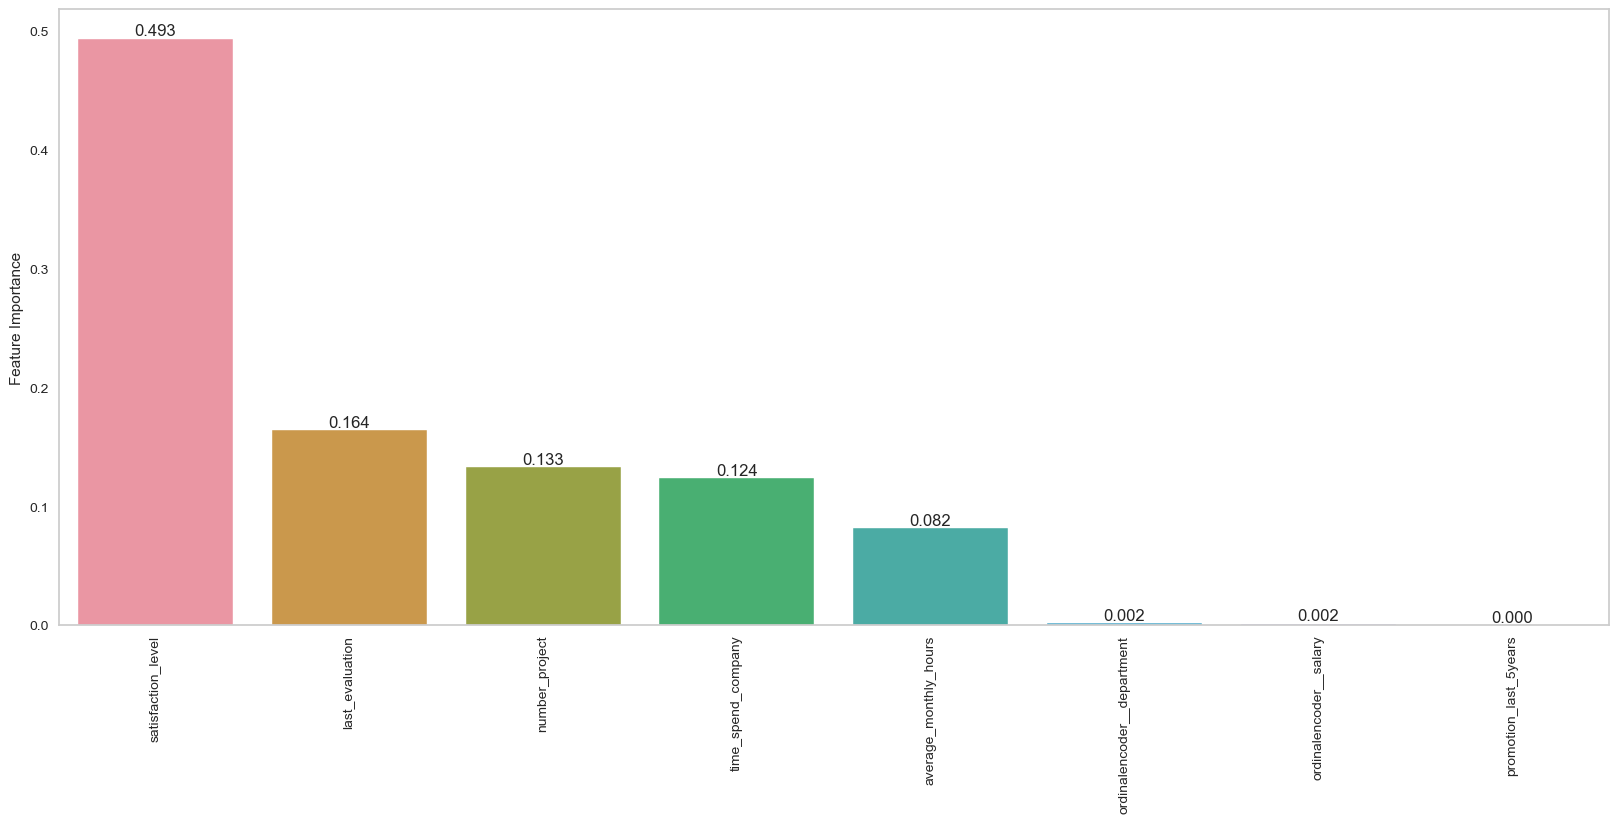

In [37]:
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.show();

In [38]:
gb_feature_importance = ["satisfaction_level", "number_project","time_spend_company","last_evaluation","average_monthly_hours"]

In [39]:
X = df[gb_feature_importance]
y = df['left']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.3, random_state=123)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8393, 5), (3598, 5), (8393,), (3598,))

In [42]:
X_train

satisfaction_level  number_project  time_spend_company  \
8013                0.980               5                   6   
5512                0.720               3                   3   
6742                0.580               3                   2   
522                 0.740               4                   6   
2869                0.740               4                   3   
...                   ...             ...                 ...   
10555               0.740               5                   2   
9605                0.760               5                   3   
3676                0.680               5                   3   
11033               0.970               4                   2   
7874                0.950               4                   2   

       last_evaluation  average_monthly_hours  
8013             0.980                    210  
5512             0.750                    166  
6742             0.910                    124  
522              0.820                    239  
2869             0.590                    155  
...                ...                    ...  
10555            0.890                    182  
9605             0.480                    173  
3676             0.880                    201  
11033            0.890                    208  
7874             0.830                    252  

[8393 rows x 5 columns]

In [43]:
# Bütün değerlerimiz nümeric olduğu için column trans uygulamamıza gerek yok.

operations2 = [("gb2", GradientBoostingClassifier(learning_rate=0.1, 
                                                max_depth=5,
                                                n_estimators=100,
                                                random_state=123))]

gb_model_final2 = Pipeline(steps = operations2)

gb_model_final2.fit(X_train, y_train)

Pipeline(steps=[('gb2',
                 GradientBoostingClassifier(max_depth=5, random_state=123))])

[[2985   16]
 [  49  548]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3001
           1       0.97      0.92      0.94       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.99      0.94      0.97      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



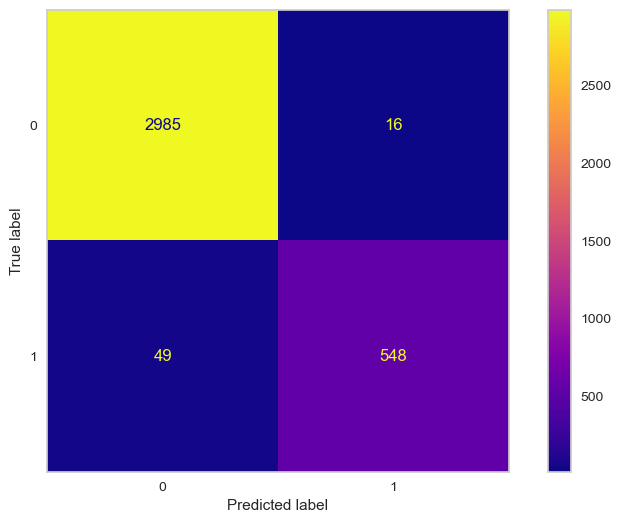

In [44]:
eval(gb_model_final2, X_train, X_test)

### Cross Validation For GB Model

In [45]:
model = gb_model_final2
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]
#overfitting olmadığını teyit ettik.

test_precision    0.972
train_precision   0.993
test_recall       0.924
train_recall      0.947
test_f1           0.947
train_f1          0.969
dtype: float64

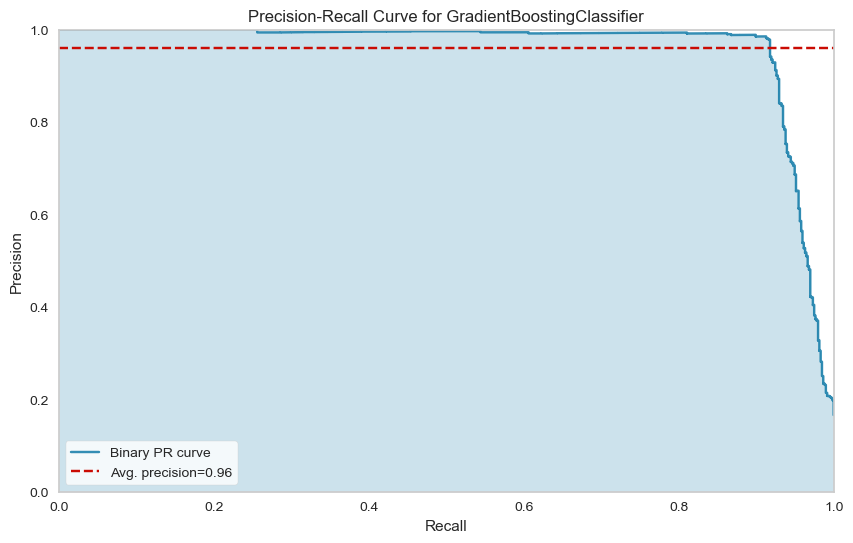

In [56]:
#precision_recall-curve
viz = PrecisionRecallCurve(gb_model_final2)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

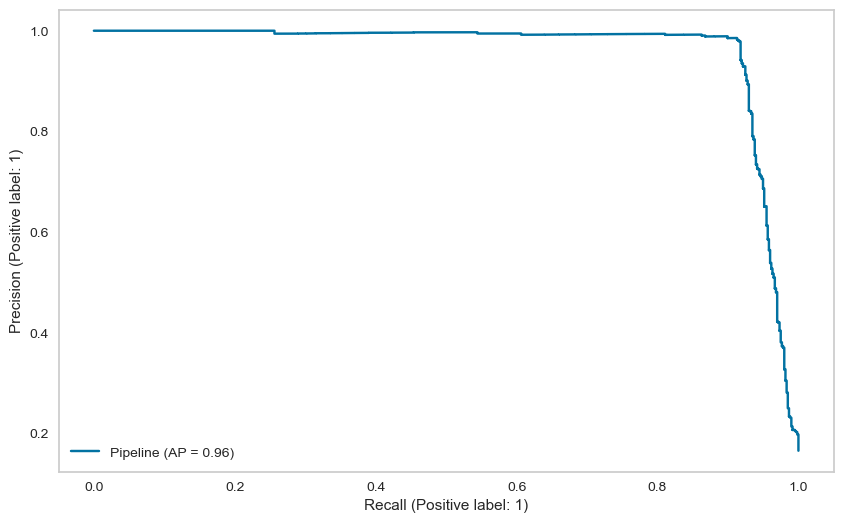

In [54]:
plot_precision_recall_curve(gb_model_final2, X_test, y_test);

### Save and Export Variables for ML Model

We will save our best model: GB Model

In [46]:
import pickle

In [47]:
operations = [("GB_final_model", GradientBoostingClassifier(learning_rate=0.1, 
                                                max_depth=5,
                                                n_estimators=100,
                                                random_state=123))]

In [48]:
pickle_model = Pipeline(steps = operations)

In [49]:
pickle_model.fit(X, y)

Pipeline(steps=[('GB_final_model',
                 GradientBoostingClassifier(max_depth=5, random_state=123))])

[[2992    9]
 [  34  563]]
Test_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3001
           1       0.98      0.94      0.96       597

    accuracy                           0.99      3598
   macro avg       0.99      0.97      0.98      3598
weighted avg       0.99      0.99      0.99      3598

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.99      0.94      0.97      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



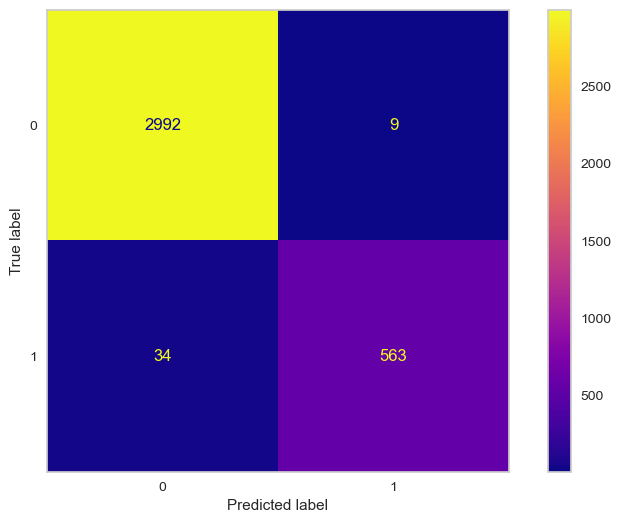

In [50]:
eval(pickle_model, X_train, X_test)

In [51]:
pickle.dump(pickle_model, open('gb_pickle_model.pkl', 'wb'))

In [52]:
pickle_model = pickle.load(open("gb_pickle_model.pkl", "rb"))
pickle_model

In [53]:
pickle_model

Pipeline(steps=[('GB_final_model',
                 GradientBoostingClassifier(max_depth=5, random_state=123))])

### Prediction For Pickle Model

In [57]:
X.head()

satisfaction_level  number_project  time_spend_company  last_evaluation  \
0               0.380               2                   3            0.530   
1               0.800               5                   6            0.860   
2               0.110               7                   4            0.880   
3               0.720               5                   5            0.870   
4               0.370               2                   3            0.520   

   average_monthly_hours  
0                    157  
1                    262  
2                    272  
3                    223  
4                    159

In [59]:
# Prediction 

sample = pd.DataFrame({'satisfaction_level': 0.38,
                       'number_project': 5,
                        'time_spend_company': 3,
                        'last_evaluation': 0.87,
                        'average_montly_hours': 222,},
                      index=[0])

In [60]:
prediction_sample = pickle_model.predict(sample)
prediction_sample  

array([0], dtype=int64)

### #ANN Classifier

#### Layer Architecture Building and Compiling

In [ ]:
df = pd.read_csv("df_clean.csv")
df.head(5)

In [ ]:
y = df['left']
X = df.drop('left', axis=1)

In [ ]:
seed = 123

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = seed)

In [ ]:
cat_onehot = ['department']
cat_ordinal = ['salary']
cat_for_salary = ['low', 'medium', 'high']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_salary]), cat_ordinal),
                                       remainder='passthrough') 


In [ ]:
X_train= column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

#enc = OneHotEncoder(handle_unknown="ignore", sparse=False)#.set_output(transform="pandas")
#enc = OneHotEncoder(handle_unknown="ignore", sparse=False)#.set_output(transform="pandas")


In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(24, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 400, verbose=1)

In [ ]:
model.summary()

#### Evaluating Model Performance and Tunning

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

In [ ]:
loss_df.plot();

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate = 0.005)#default degeri 0.001 ben arttirdim, stepsize= slope*LR adim sayim artti, hizli ogrenecek.
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)
#patience 15 sefer sonuc degismiyorsa azaliyorsa yukselmiyorsa dur. 
#restore_best_weights = True, en son degeri alma en iyi degeri al. cunku en son deger azalan olabilir.

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

GRIDSEARCH

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [ ]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

In [ ]:
#for gridsearchcv model

y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

#### Prediction

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = model.predict(X_test)

PREDICTION

In [ ]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = scaler.transform(sample_value)

  return model.predict(sample_value)

In [ ]:
# Predictions
# Value order 
sample_value = [0.38,	0.53,	2,	157,	3,	0,	0,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High probability of leaving the job!')
else:
  print('Prediction: High probability of continuing the job!')

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

### Save and Export Variables
